<a href="https://colab.research.google.com/github/samuelflores/deep-learning-RNA-structure-prediction/blob/main/pyDCA_PRC_Sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import math
from numpy import asarray
from numpy import save
from numpy import load

from sklearn.preprocessing import StandardScaler
import os
import tempfile


import matplotlib as mpl
import sklearn

In [75]:
from sklearn.metrics import PrecisionRecallDisplay

In [76]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot( recall, precision, label=name, linewidth=2, **kwargs)
    plt.ylabel('Precision = TP/(TP+FP)')
    plt.xlabel('Recall = TP/(TP + FN)')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [180]:
#df = pd.read_csv('./drive/MyDrive/deep-learning-RNA-structure-prediction/Floyd_Scripts_and_Figs/labeledfrequenciesanddca_april_26.csv')
#On sam's drive, the path is different:
df = pd.read_csv('/Users/samuel/github/deep-learning-RNA-structure-prediction-github/Floyd_Scripts_and_Figs/./labeledfrequenciesanddca_april_26.csv')


df['i'] = df['index'].str.split(pat=':', n=1, expand=True)[0] # n=1 because we only need one column, the first one. I anyway specify index [0]
df['j'] = df['index'].str.split(pat=':', n=2, expand=True)[1] # take everything AFTER the ":". hence two columns, of which i take the second, [1]
df['j'] = df['j'].str[:-4] # then remove last 4 chars

df['i'] = df['i'].astype(int)
df['j'] = df['j'].astype(int)



df['pdb'] = df['index'].str.slice(start=-4)
print("df.shape before culling:")
print(df.shape)
df = df.drop(df[df['i'] > df['j']-3].index)
print("df.shape AFTER culling:")
print(df.shape)

print ("index:" )
print(df['index'])
print ("i: ")
print(df['i'])
print ("j: ")
print(df['j'])
print ("pdb: ")
print( df['pdb'])


df.shape before culling:
(1623417, 32)
df.shape AFTER culling:
(790256, 32)
index:
3            1:43D2G
4            1:53D2G
5            1:63D2G
6            1:73D2G
7            1:83D2G
             ...    
1622995    79:834FRG
1622996    79:844FRG
1623079    80:834FRG
1623080    80:844FRG
1623164    81:844FRG
Name: index, Length: 790256, dtype: object
i: 
3           1
4           1
5           1
6           1
7           1
           ..
1622995    79
1622996    79
1623079    80
1623080    80
1623164    81
Name: i, Length: 790256, dtype: int64
j: 
3           4
4           5
5           6
6           7
7           8
           ..
1622995    83
1622996    84
1623079    83
1623080    84
1623164    84
Name: j, Length: 790256, dtype: int64
pdb: 
3          3D2G
4          3D2G
5          3D2G
6          3D2G
7          3D2G
           ... 
1622995    4FRG
1622996    4FRG
1623079    4FRG
1623080    4FRG
1623164    4FRG
Name: pdb, Length: 790256, dtype: object


In [181]:

# I no longer use this..
#from google.colab import drive
#drive.mount('/content/drive')
df

,index,GA,GG,GC,GU,G-,CC,CU,CG,CA,...,-C,-U,-G,-A,bond_type,dca_val,file2,i,j,pdb
3,1:43D2G,0.0600,0.0362,0.0628,0.0393,0.0006,0.0465,0.0268,0.0431,0.0609,...,0.0015,0.0006,0.0002,0.0006,0,-0.062766,3D2G,1,4,3D2G
4,1:53D2G,0.0399,0.0422,0.0820,0.0345,0.0002,0.0831,0.0325,0.0153,0.0465,...,0.0018,0.0002,0.0009,0.0009,0,0.037044,3D2G,1,5,3D2G
5,1:63D2G,0.0450,0.0159,0.0833,0.0543,0.0004,0.0740,0.0549,0.0125,0.0360,...,0.0031,0.0007,0.0003,0.0011,0,-0.058877,3D2G,1,6,3D2G
6,1:73D2G,0.0897,0.0586,0.0401,0.0101,0.0004,0.0480,0.0072,0.0304,0.0916,...,0.0019,0.0003,0.0015,0.0028,0,0.006598,3D2G,1,7,3D2G
7,1:83D2G,0.0044,0.1276,0.0649,0.0017,0.0003,0.0315,0.0008,0.1437,0.0011,...,0.0030,0.0000,0.0033,0.0002,0,-0.012979,3D2G,1,8,3D2G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622995,79:834FRG,0.0377,0.0000,0.0094,0.0425,0.0000,0.0142,0.0189,0.0047,0.0142,...,0.0000,0.0000,0.0000,0.0000,0,-0.016697,4FRG,79,83,4FRG
1622996,79:844FRG,0.0708,0.0000,0.0047,0.0142,0.0000,0.0094,0.0142,0.0000,0.0189,...,0.0000,0.0000,0.0000,0.0000,0,-0.242466,4FRG,79,84,4FRG
1623079,80:834FRG,0.1840,0.0377,0.0425,0.3255,0.0047,0.0000,0.0094,0.0094,0.0094,...,0.0000,0.0047,0.0000,0.0047,0,-0.066508,4FRG,80,83,4FRG
1623080,80:844FRG,0.5236,0.0047,0.0142,0.0425,0.0094,0.0094,0.0047,0.0047,0.0094,...,0.0000,0.0094,0.0000,0.0000,0,-0.017244,4FRG,80,84,4FRG


In [182]:
df['bond_type'].values[df['bond_type']>0] = 1

In [183]:
set(df.bond_type)

{0, 1}

In [184]:
scaler = preprocessing.MinMaxScaler()
dca = df[['dca_val']]

In [185]:
y = scaler.fit_transform(dca)

In [186]:
#df

In [187]:
df.nlargest(n=10, columns=["dca_val"]) #.bond_type.values()


,index,GA,GG,GC,GU,G-,CC,CU,CG,CA,...,-C,-U,-G,-A,bond_type,dca_val,file2,i,j,pdb
524991,29:411EHZ,0.0000,0.0000,0.3372,0.0063,0.0000,0.0010,0.0000,0.1288,0.0021,...,0.0000,0.0000,0.0000,0.0000,1,4.906716,1EHZ,29,41,1EHZ
160235,33:413RG5,0.0004,0.0000,0.2750,0.0021,0.0004,0.0000,0.0004,0.0326,0.0000,...,0.0004,0.0000,0.0000,0.0000,1,4.764795,3RG5,33,41,3RG5
1592764,69:781Z43,0.0029,0.0002,0.2891,0.0002,0.0000,0.0000,0.0002,0.1229,0.0000,...,0.0000,0.0000,0.0000,0.0002,1,4.654802,1Z43,69,78,1Z43
176456,56:684GMA,0.0002,0.0000,0.0936,0.0044,0.0002,0.0001,0.0003,0.6656,0.0009,...,0.0001,0.0001,0.0007,0.0002,0,4.640454,4GMA,56,68,4GMA
627810,18:236CB3,0.0024,0.0012,0.1813,0.0024,0.0012,0.0024,0.0000,0.2161,0.0000,...,0.0000,0.0000,0.0000,0.0000,1,4.623609,6CB3,18,23,6CB3
155662,42:561P6V,0.0000,0.0004,0.3276,0.0000,0.0072,0.0021,0.0001,0.4826,0.0003,...,0.0001,0.0000,0.0000,0.0000,0,4.623278,1P6V,42,56,1P6V
175828,53:704GMA,0.0065,0.0012,0.3764,0.0079,0.0000,0.0001,0.0000,0.1772,0.0006,...,0.0004,0.0001,0.0002,0.0004,0,4.551678,4GMA,53,70,4GMA
183890,91:1524GMA,0.0013,0.0007,0.1512,0.0044,0.0021,0.0006,0.0008,0.5529,0.0024,...,0.0006,0.0001,0.0006,0.0005,0,4.529522,4GMA,91,152,4GMA
3989,52:633D2G,0.0003,0.0002,0.0242,0.0047,0.0000,0.0001,0.0006,0.5137,0.0010,...,0.0000,0.0000,0.0002,0.0010,1,4.512157,3D2G,52,63,3D2G
1069971,7:171U9S,0.0002,0.0006,0.5842,0.0003,0.0002,0.0002,0.0000,0.0539,0.0003,...,0.0006,0.0002,0.0000,0.0000,1,4.497591,1U9S,7,17,1U9S


In [188]:
topN = 10
print(sum(df.nlargest(n=topN, columns=["dca_val"]).bond_type.values)/topN)

0.6


In [189]:
mpl.rcParams['figure.figsize'] = (15, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

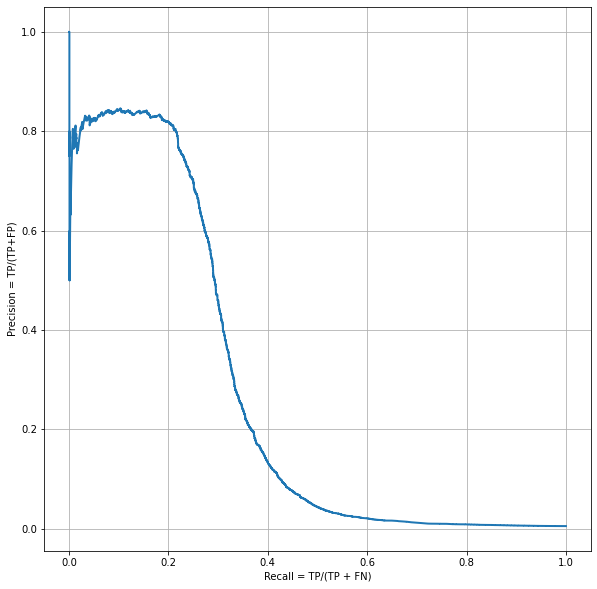

In [190]:
plot_prc('pyDCA', df.bond_type, y)

In [191]:
display = PrecisionRecallDisplay.from_predictions(df.bond_type, y, name="pyDCA")
_ = display.ax_.set_title("2-class Precision-Recall curve")

AttributeError: type object 'PrecisionRecallDisplay' has no attribute 'from_predictions'

myPdbs.shape =  80
['3D2G' '4RZD' '3Q3Z' '4P95' '1GID' '4R4V' '5KPY' '3F2Q' '6HAG' '2KRL'
 '5U3G' '1P6V' '3RG5' '4GMA' '1XJR' '5T5A' '2H0S' '5NWQ' '4PQV' '2N1Q'
 '4Y1O' '4L81' '2NBX' '2MF0' '3BWP' '1EHZ' '1NBS' '4RUM' '2LC8' '4C4Q'
 '1L9A' '6CB3' '1KXK' '4JRC' '3NKB' '4ENC' '4JF2' '4QLN' '4TZX' '3T4B'
 '4YAZ' '5LYS' '3GX5' '3SLQ' '6FZ0' '4WFL' '2IL9' '6UES' '4LVV' '1S9S'
 '5DDP' '4P5J' '3PDR' '5OB3' '3ZP8' '2OIU' '1FFZ' '1Z2J' '6QN3' '1U9S'
 '3DIL' '4PLX' '2KE6' '5K7D' '5M0H' '3NDB' '4XWF' '3R4F' '5DI2' '6OL3'
 '5ZAL' '4R0D' '3OX0' '6CU1' '3E5C' '1Z43' '1C2X' '5DUN' '4K27' '4FRG']
3D2G
myDF.shape =  (2775, 32)
4RZD
myDF.shape =  (4656, 32)
3Q3Z
myDF.shape =  (2628, 32)
4P95
myDF.shape =  (17391, 32)
1GID
myDF.shape =  (12090, 32)
4R4V
myDF.shape =  (16836, 32)
5KPY
myDF.shape =  (2346, 32)
3F2Q
myDF.shape =  (5565, 32)
6HAG
myDF.shape =  (820, 32)
2KRL
myDF.shape =  (4950, 32)
5U3G
myDF.shape =  (3403, 32)
1P6V
myDF.shape =  (2145, 32)
3RG5
myDF.shape =  (3486, 32)
4GMA
myDF.shape =  (

/var/folders/0y/0v6zbkk16wd_7cn71mpgjbj00000gn/T/ipykernel_8748/11360199.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


2NBX
myDF.shape =  (5565, 32)
2MF0
myDF.shape =  (2415, 32)
3BWP
myDF.shape =  (83845, 32)
1EHZ
myDF.shape =  (2701, 32)
1NBS
myDF.shape =  (6903, 32)
4RUM
myDF.shape =  (4005, 32)
2LC8
myDF.shape =  (1830, 32)
4C4Q
myDF.shape =  (26565, 32)
1L9A
myDF.shape =  (7875, 32)
6CB3
myDF.shape =  (4656, 32)
1KXK
myDF.shape =  (2278, 32)
4JRC
myDF.shape =  (1485, 32)
3NKB
myDF.shape =  (1891, 32)
4ENC
myDF.shape =  (1225, 32)
4JF2
myDF.shape =  (2775, 32)
4QLN
myDF.shape =  (6555, 32)
4TZX
myDF.shape =  (2346, 32)
3T4B
myDF.shape =  (3321, 32)
4YAZ
myDF.shape =  (3321, 32)
5LYS
myDF.shape =  (1431, 32)
3GX5
myDF.shape =  (4186, 32)
3SLQ
myDF.shape =  (2080, 32)
6FZ0
myDF.shape =  (1035, 32)
4WFL
myDF.shape =  (5356, 32)
2IL9
myDF.shape =  (8778, 32)
6UES
myDF.shape =  (6786, 32)
4LVV
myDF.shape =  (3741, 32)
1S9S
myDF.shape =  (4851, 32)
5DDP
myDF.shape =  (1711, 32)
4P5J
myDF.shape =  (3321, 32)
3PDR
myDF.shape =  (12561, 32)
5OB3
myDF.shape =  (2211, 32)
3ZP8
myDF.shape =  (820, 32)
2OIU
myD

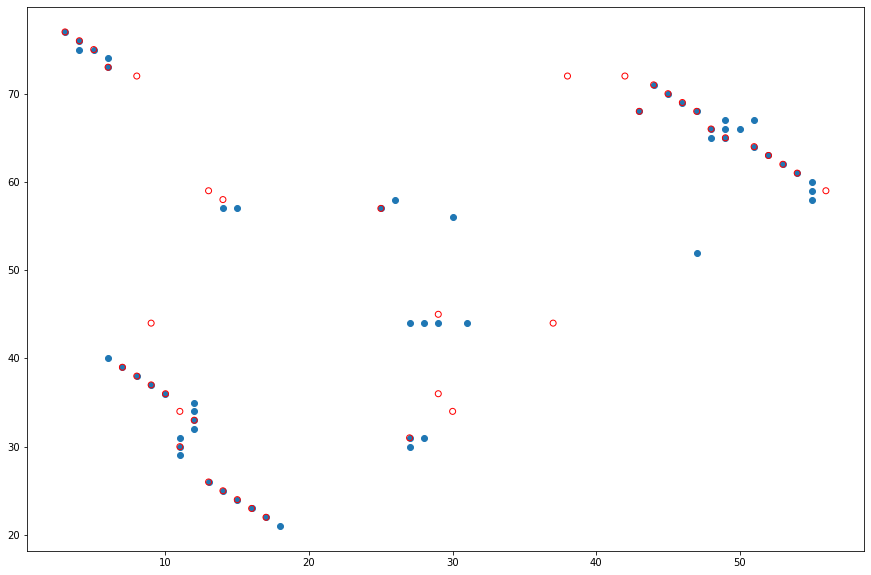

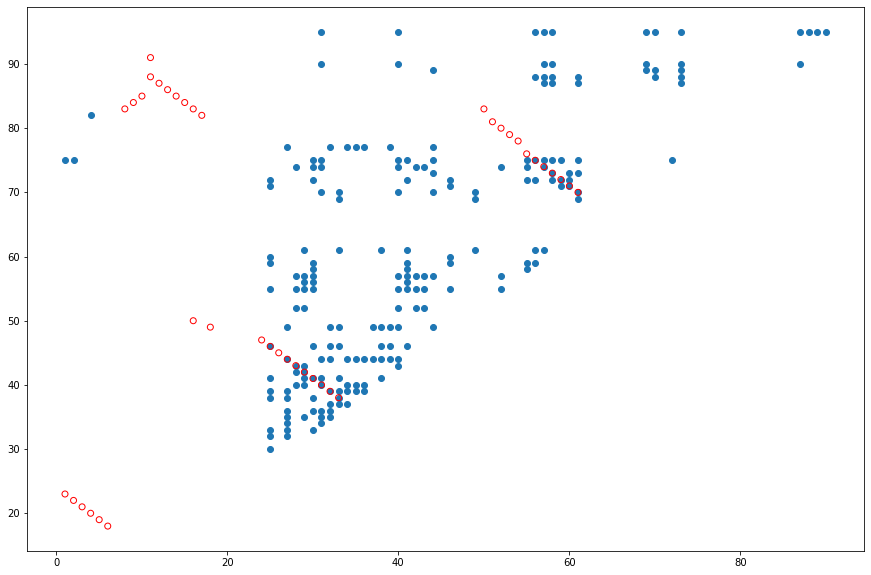

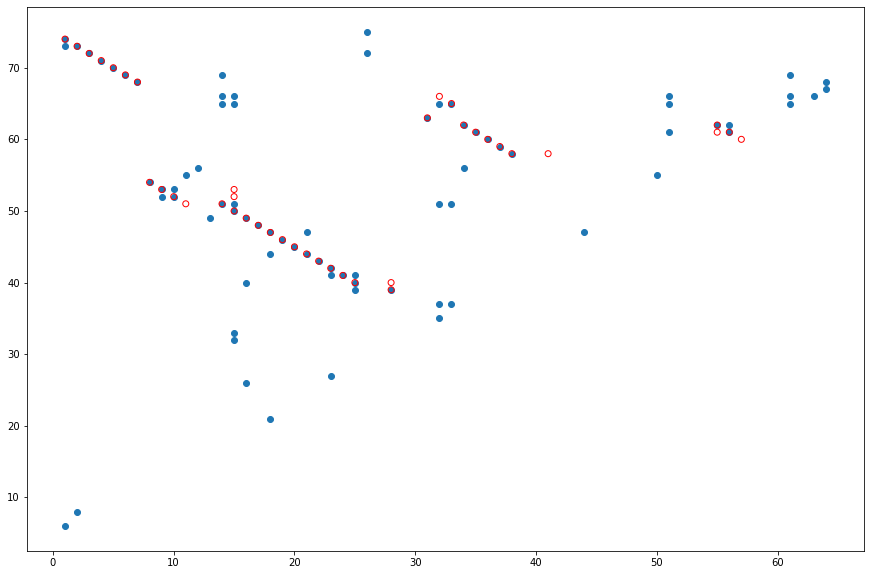

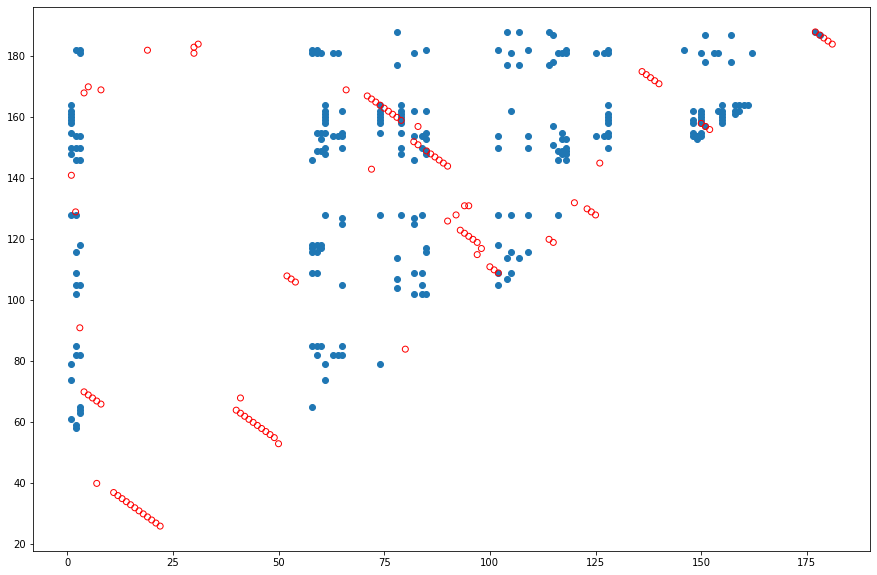

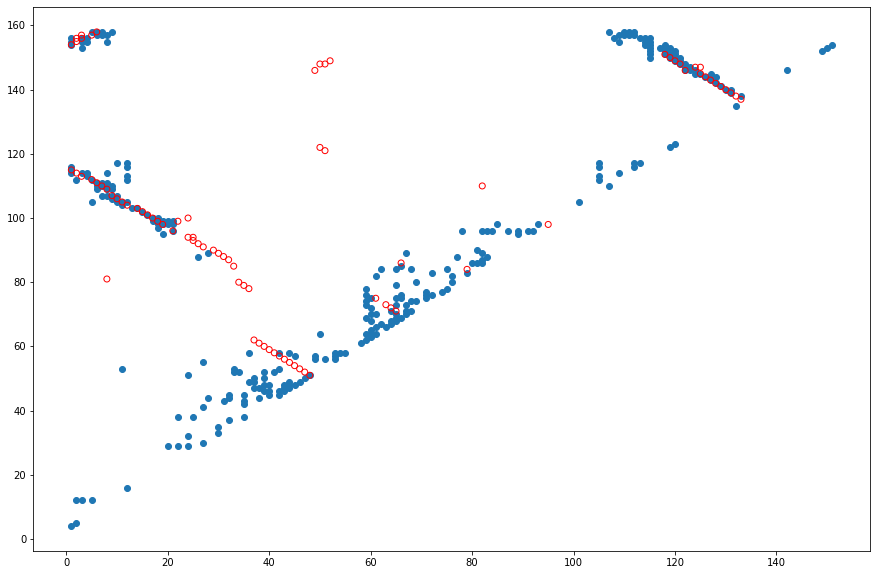

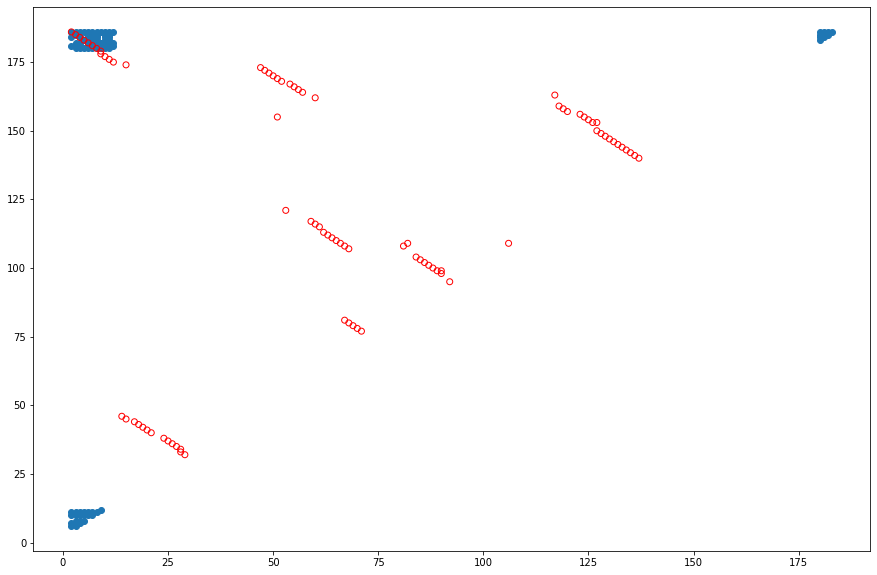

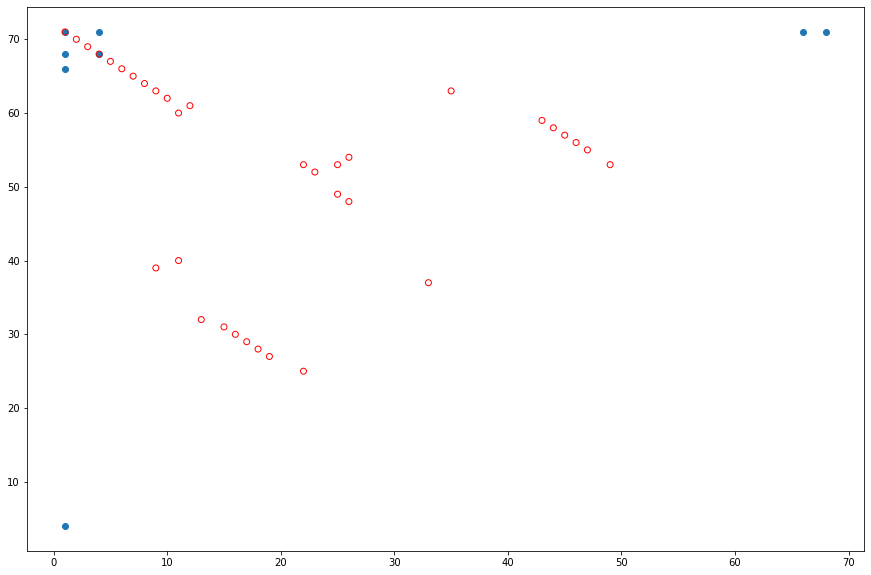

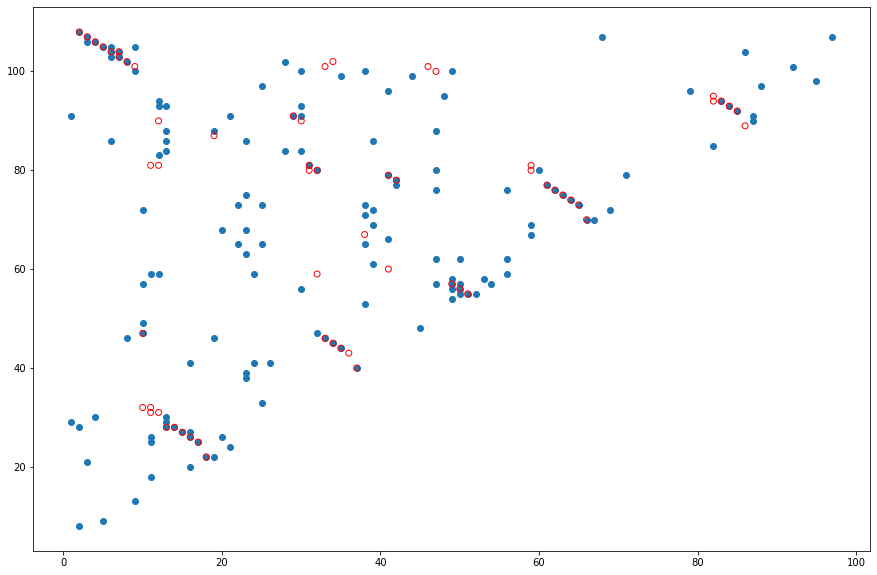

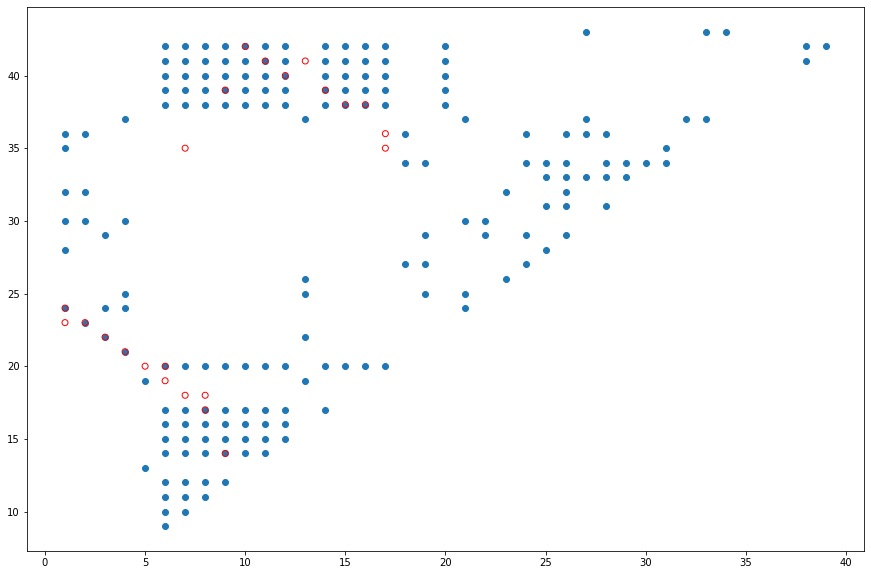

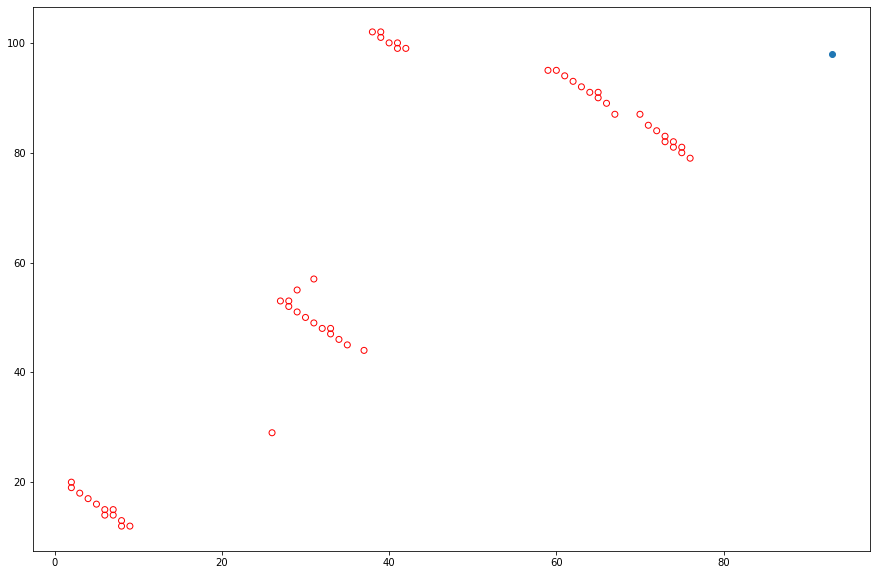

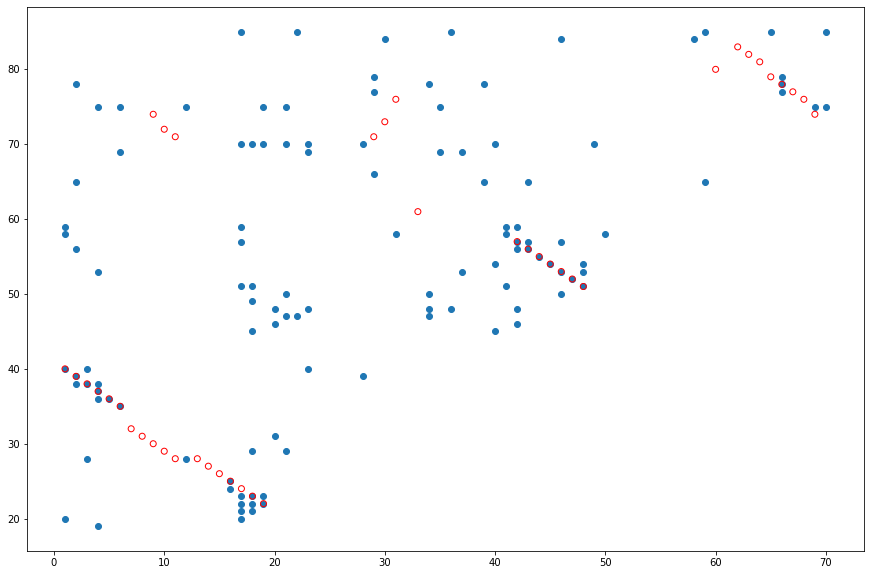

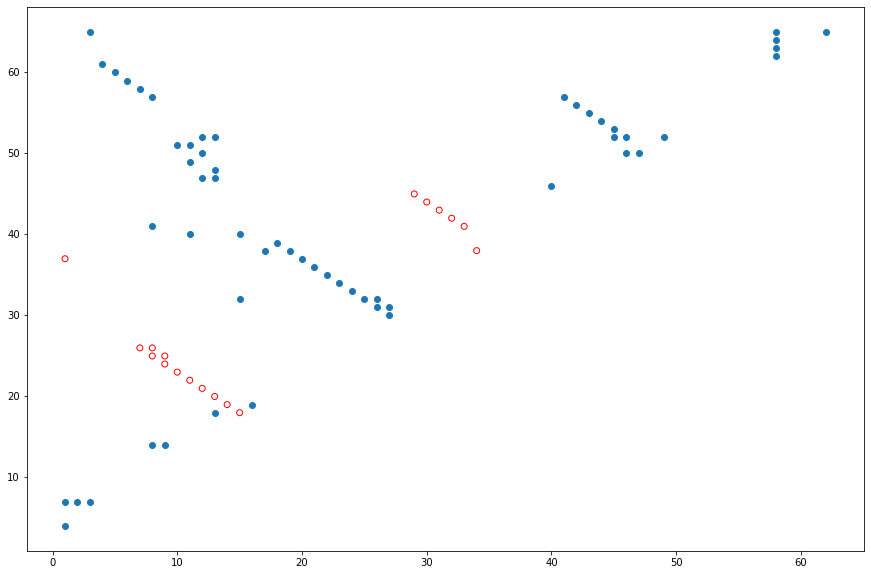

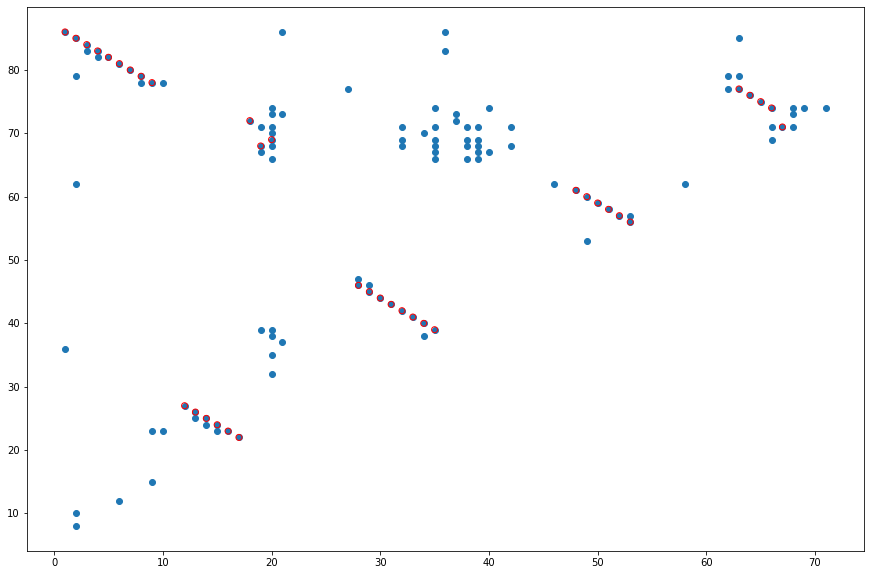

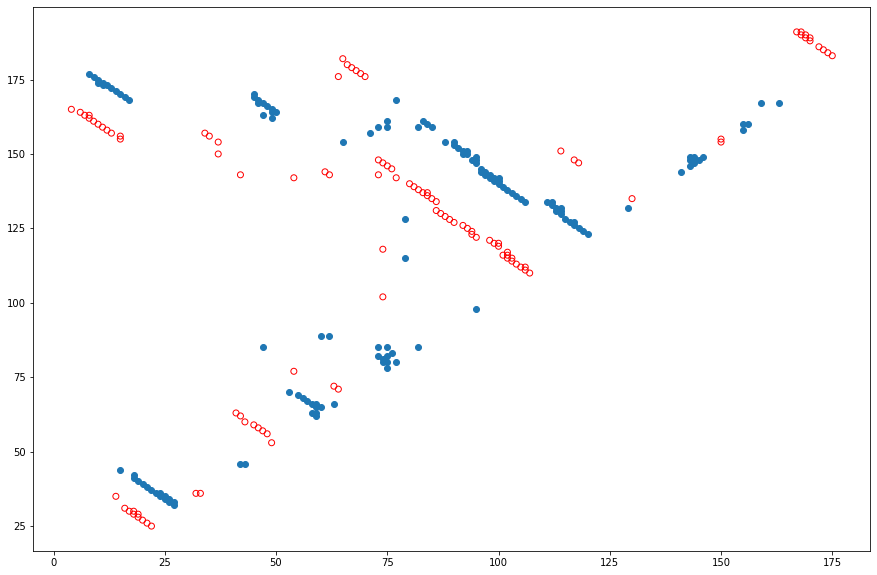

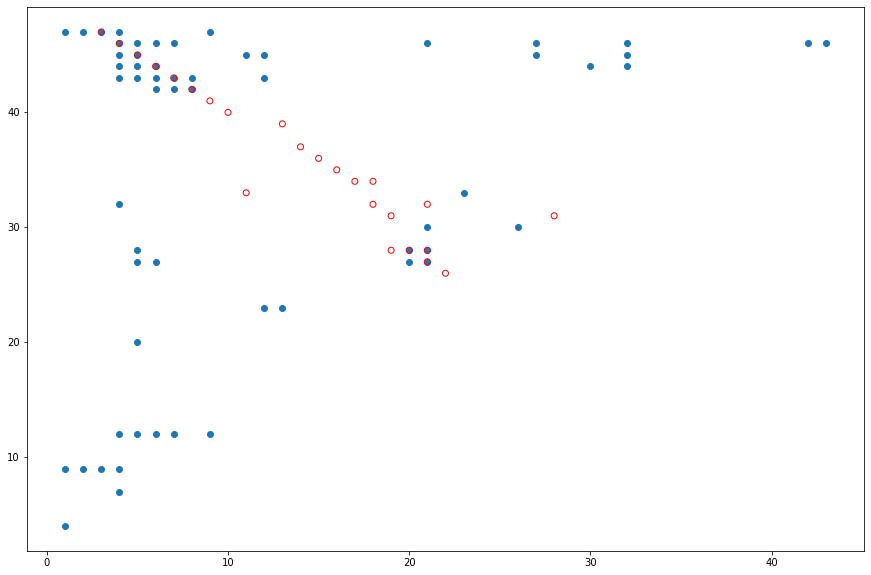

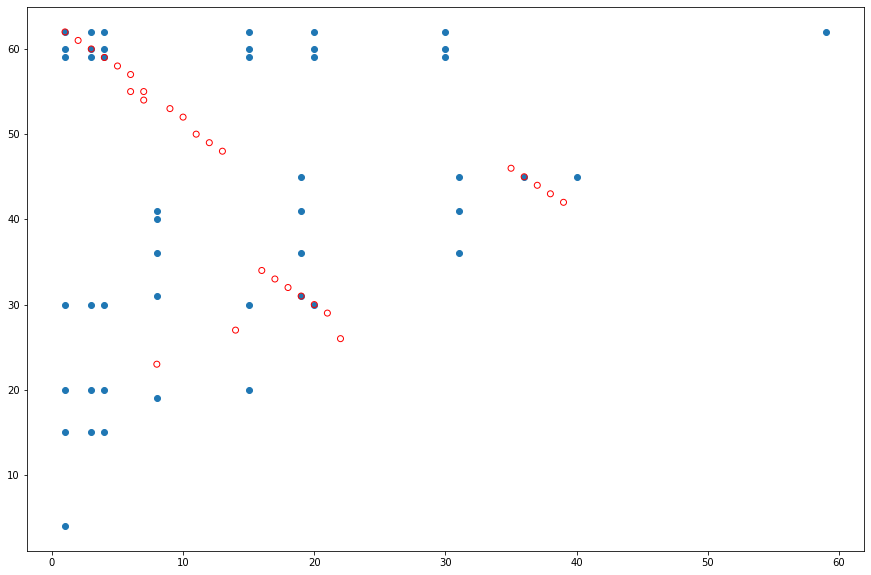

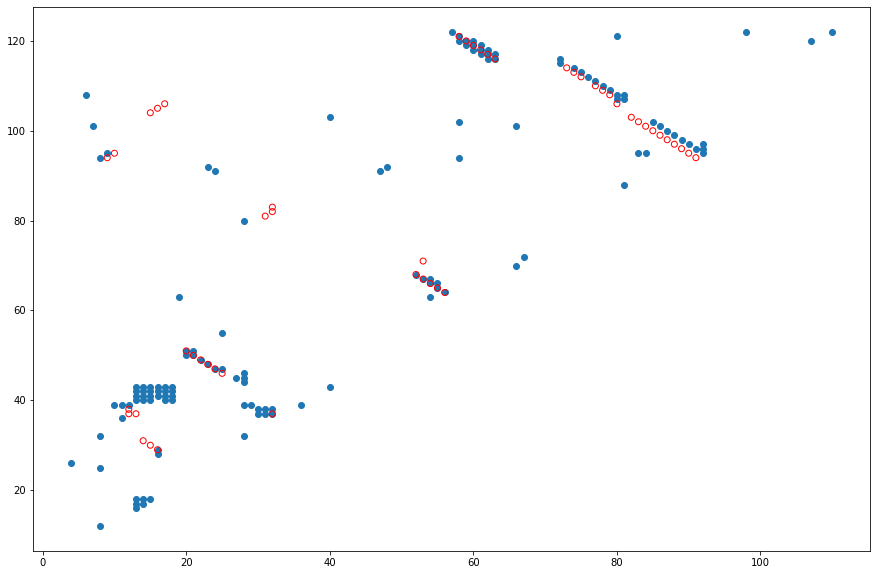

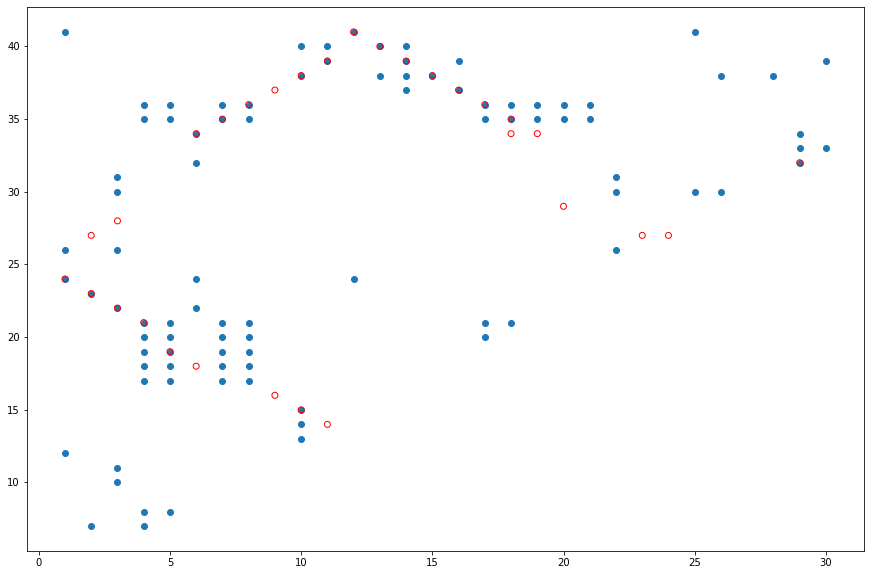

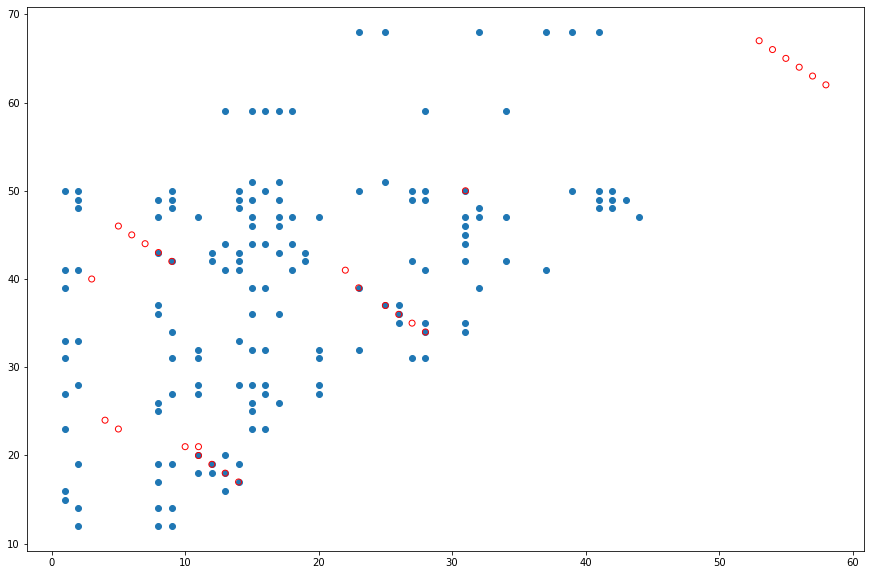

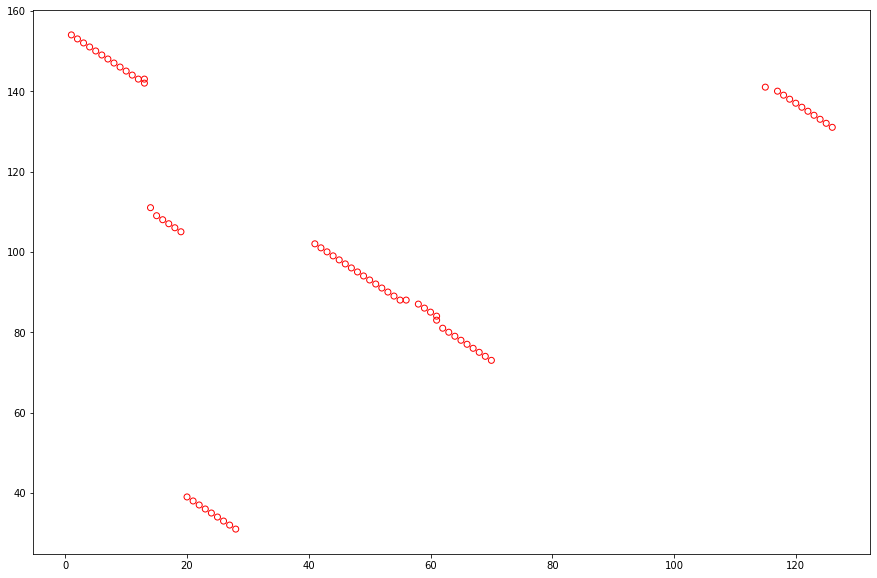

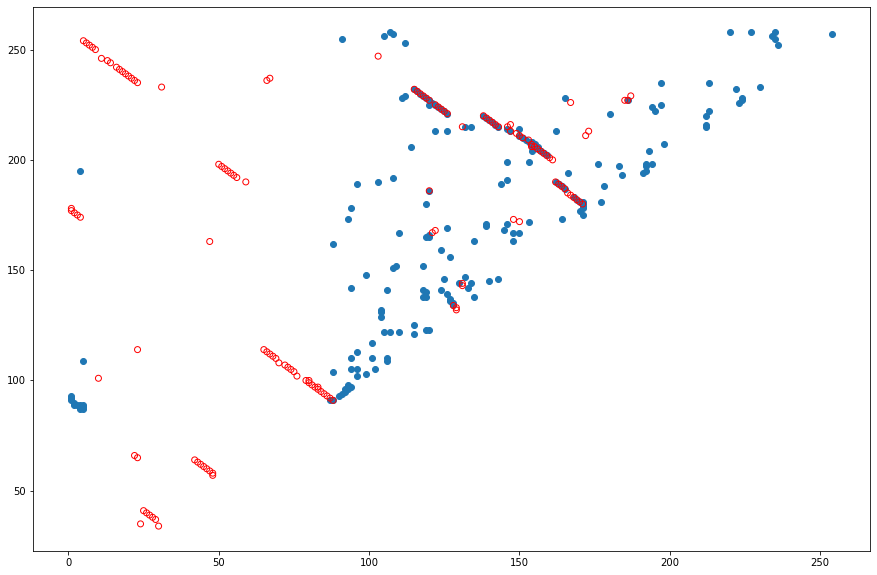

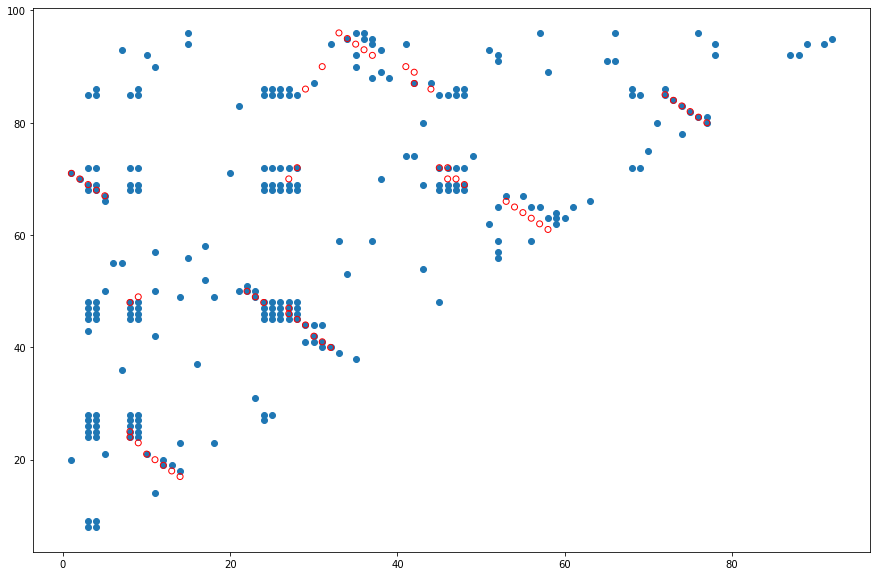

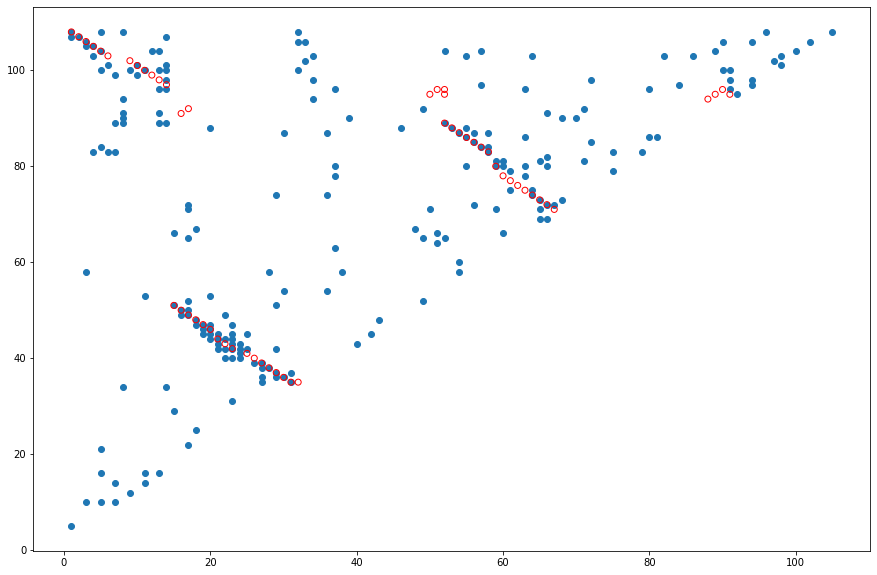

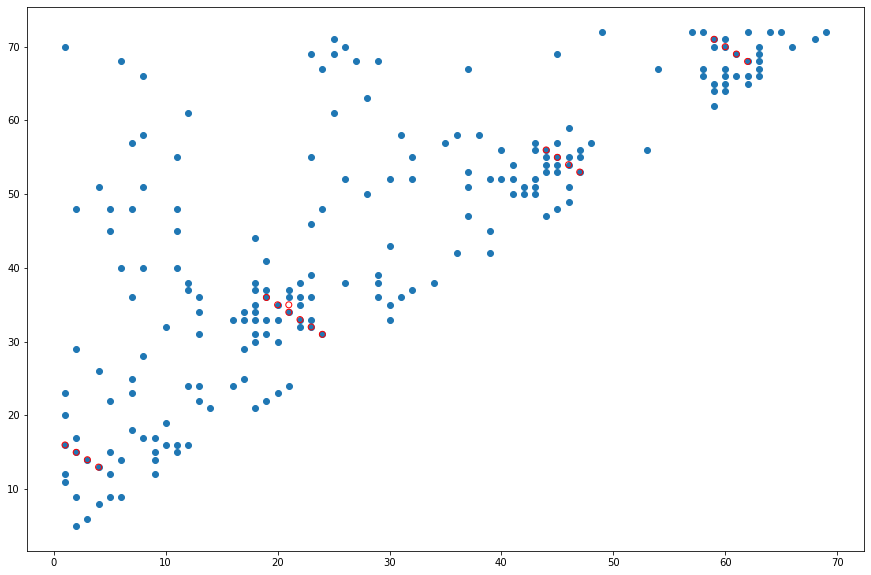

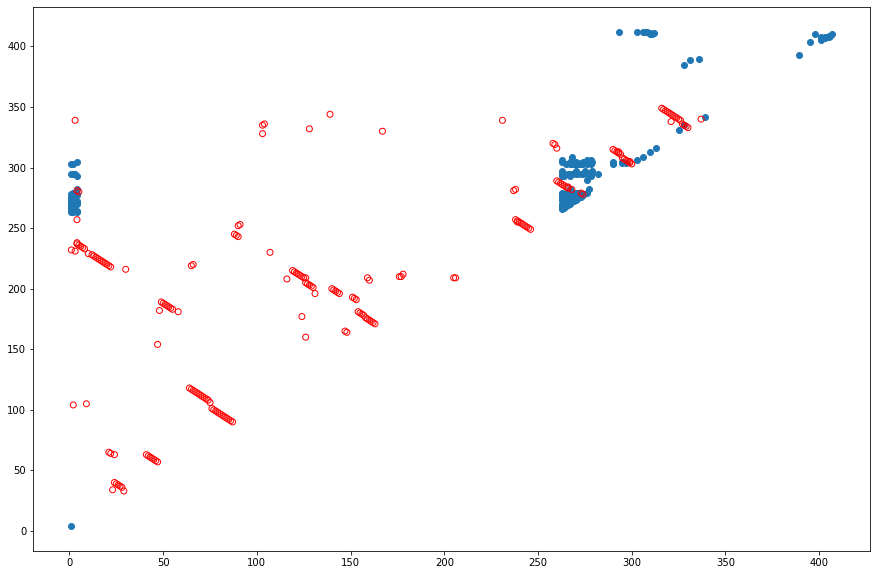

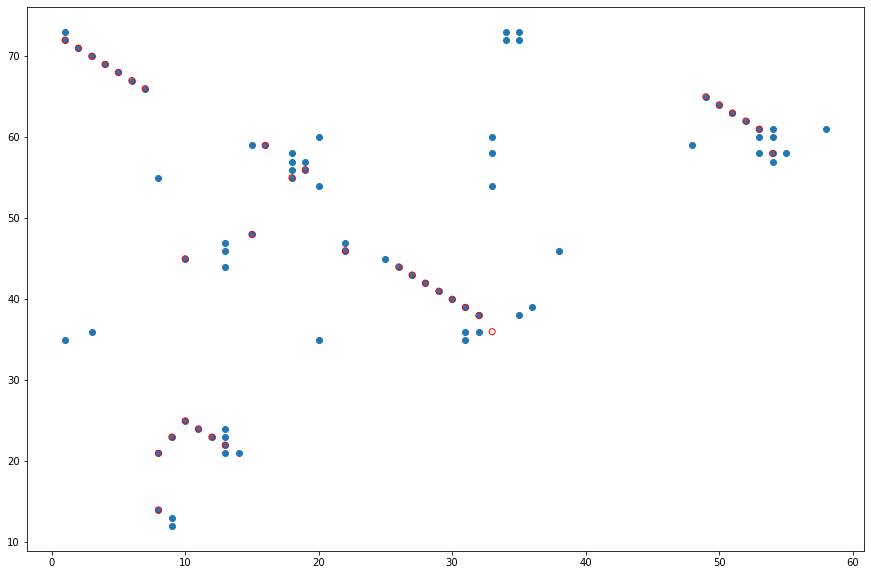

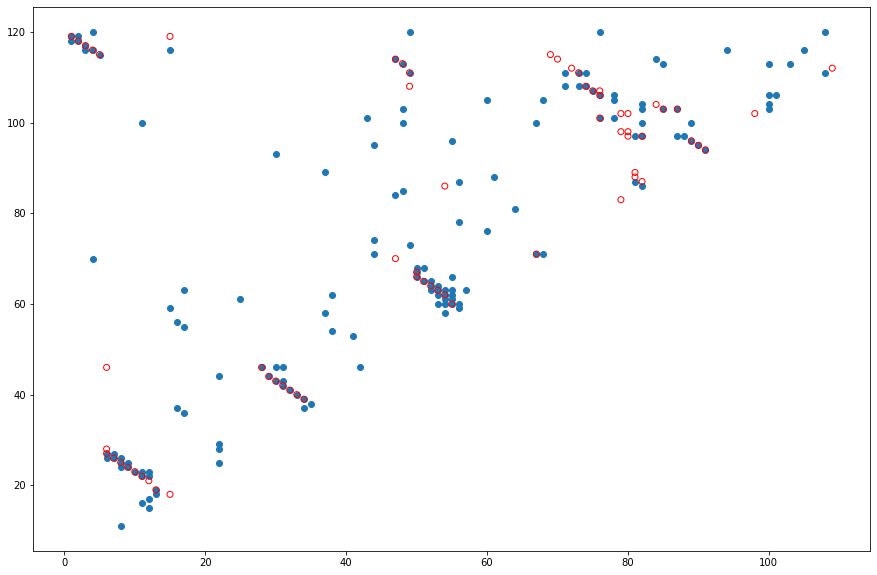

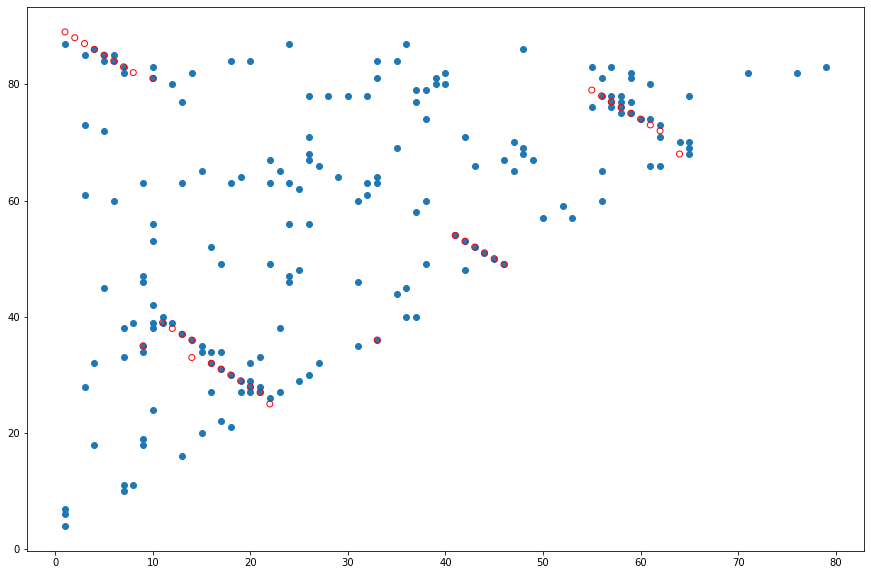

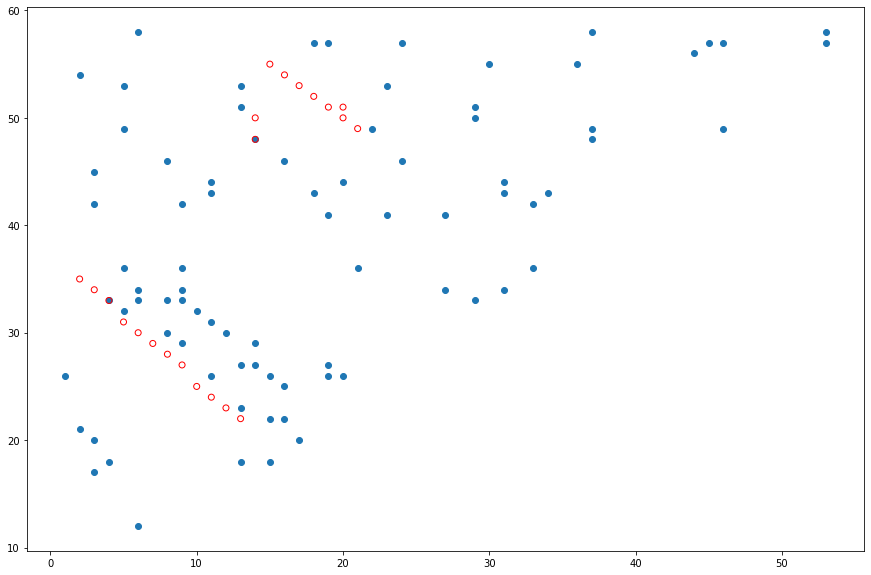

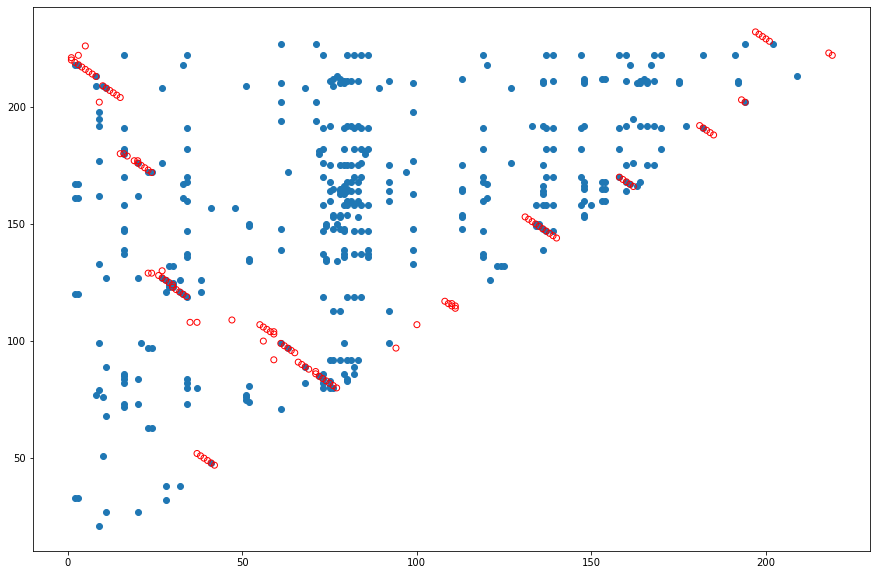

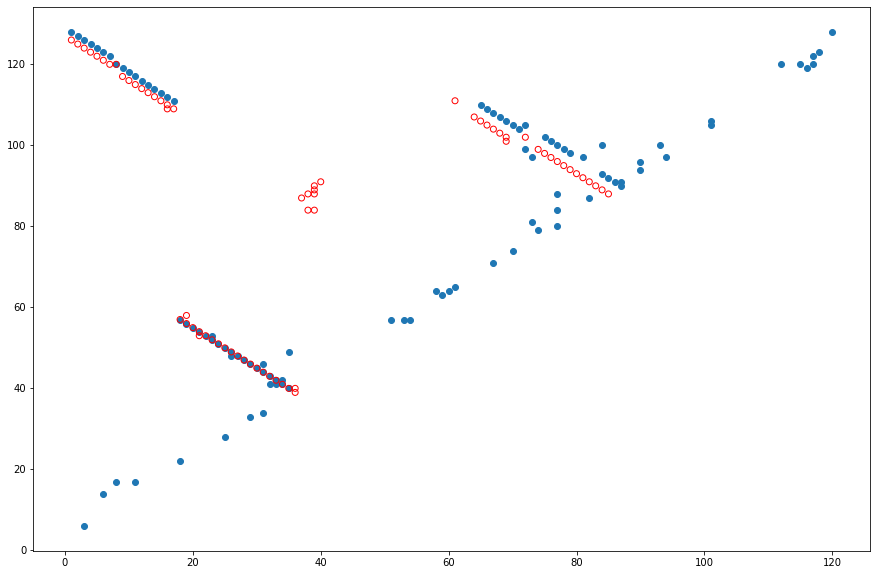

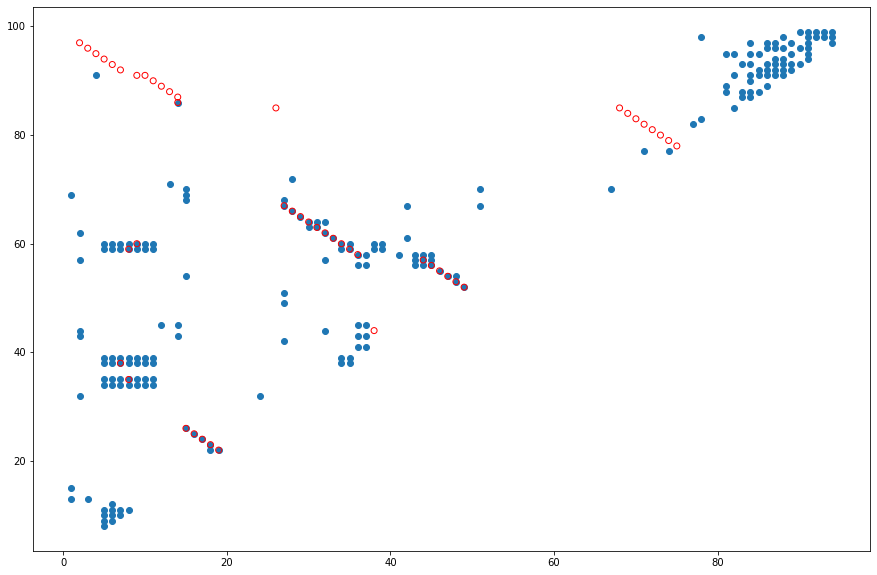

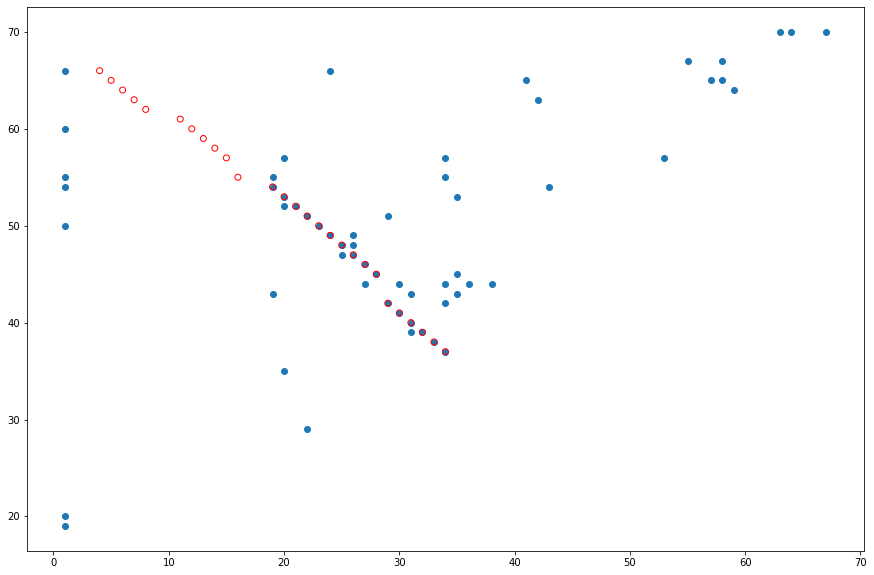

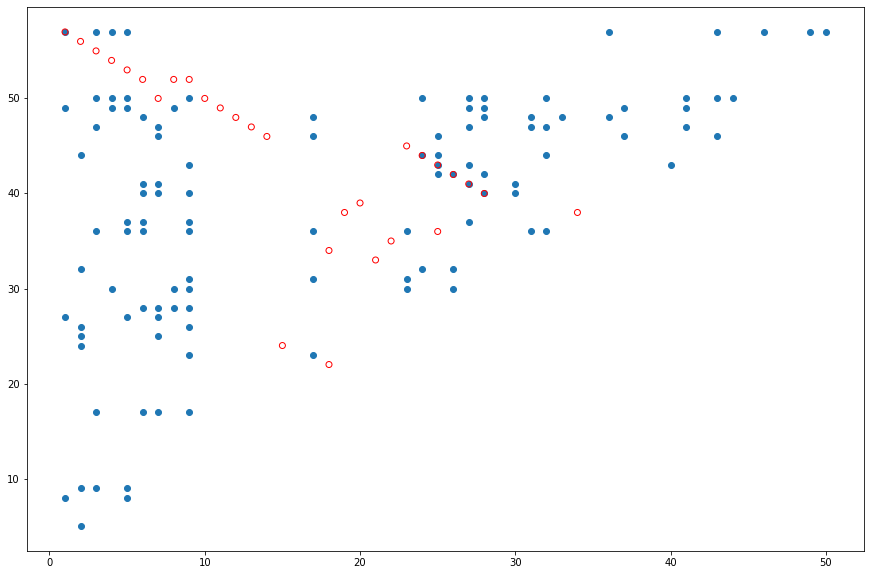

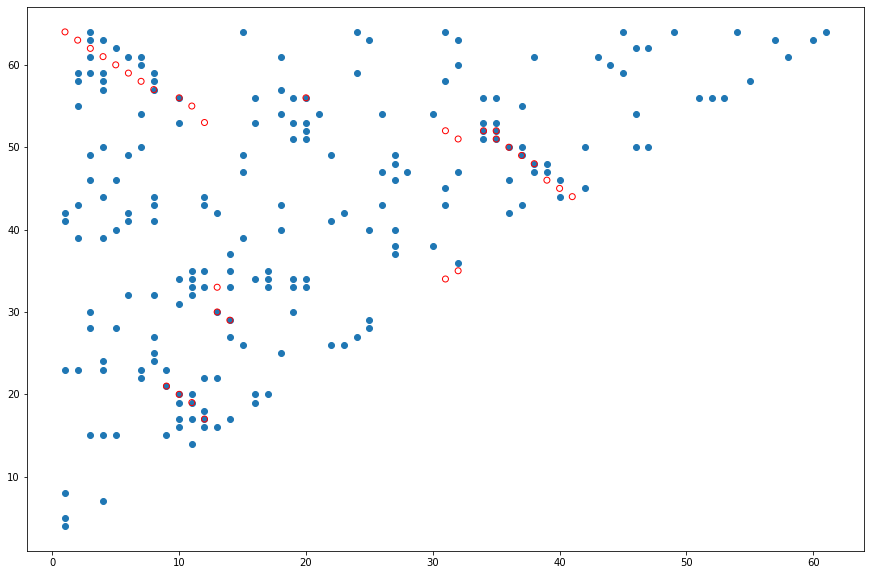

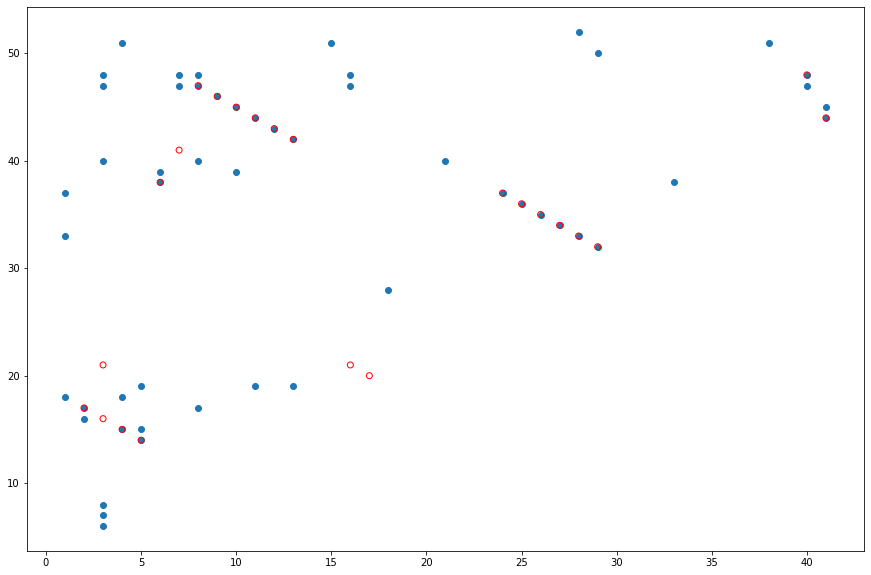

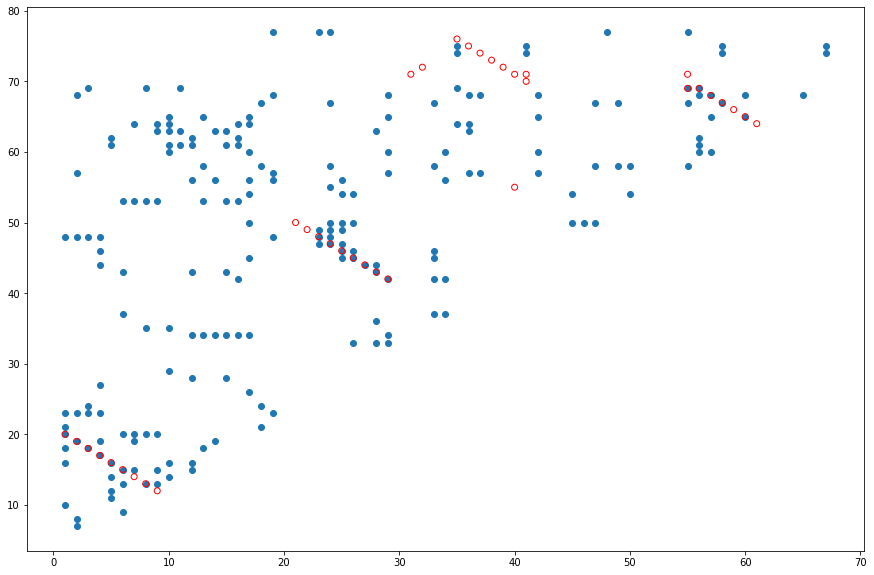

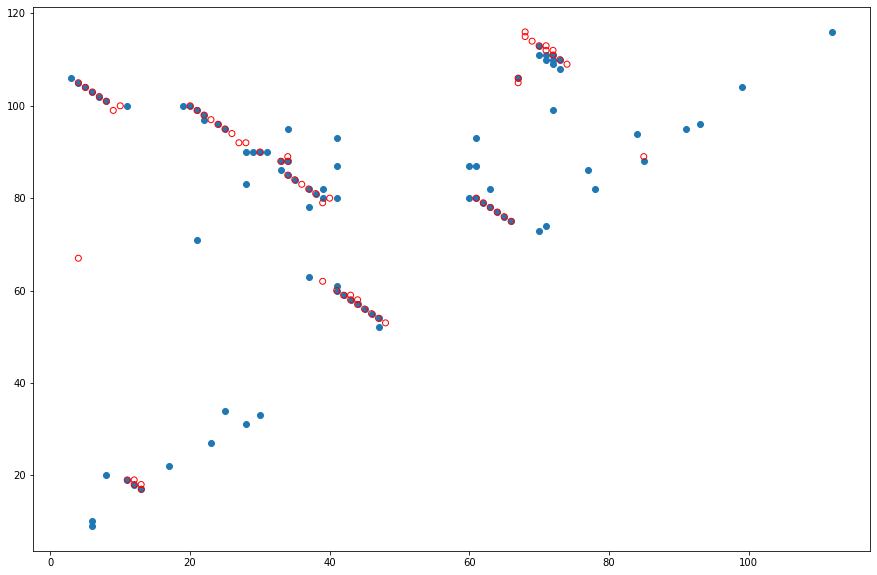

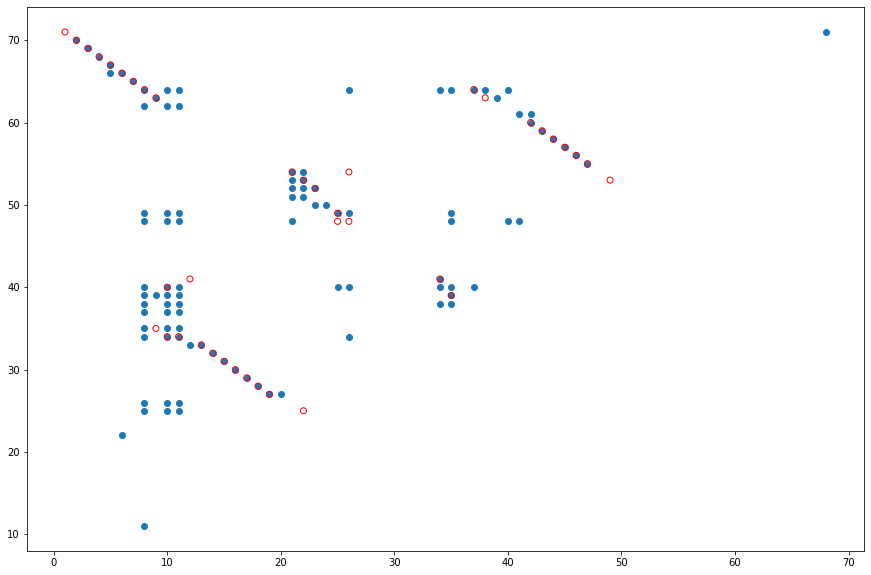

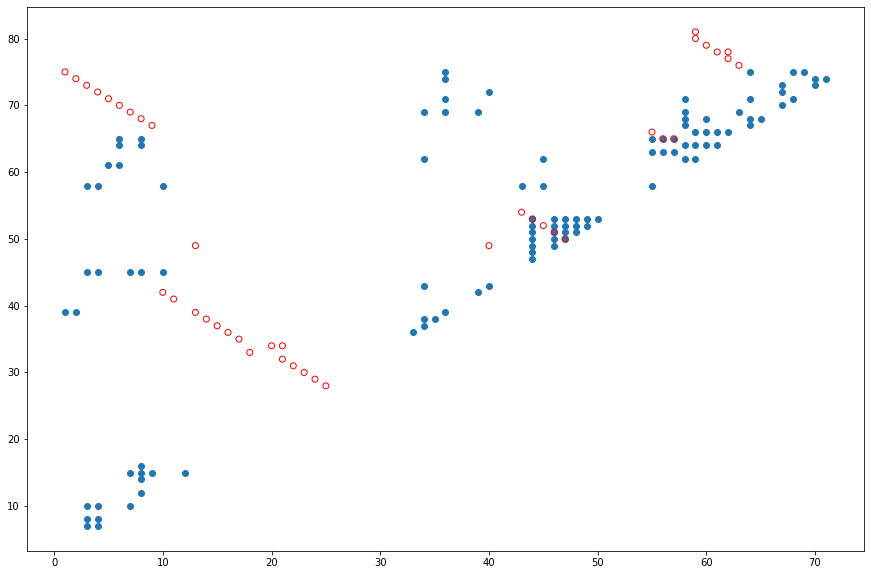

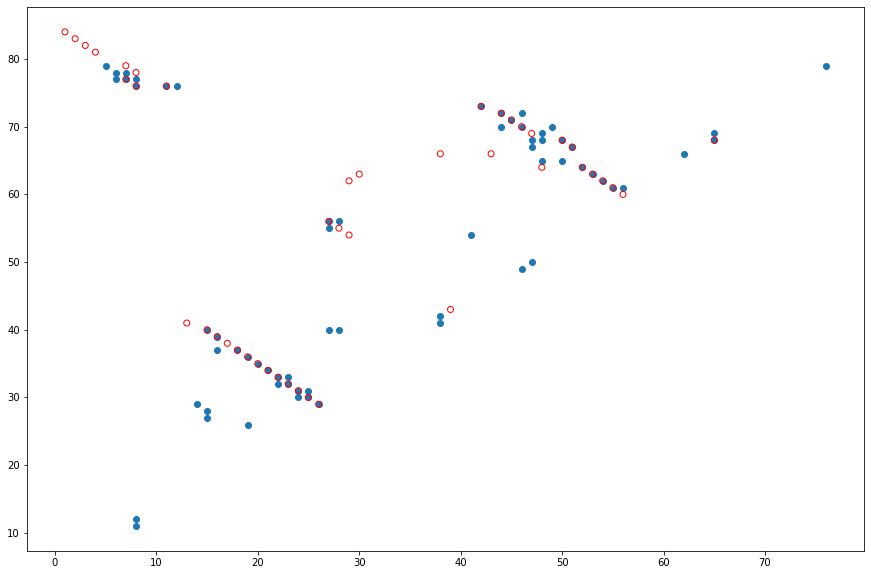

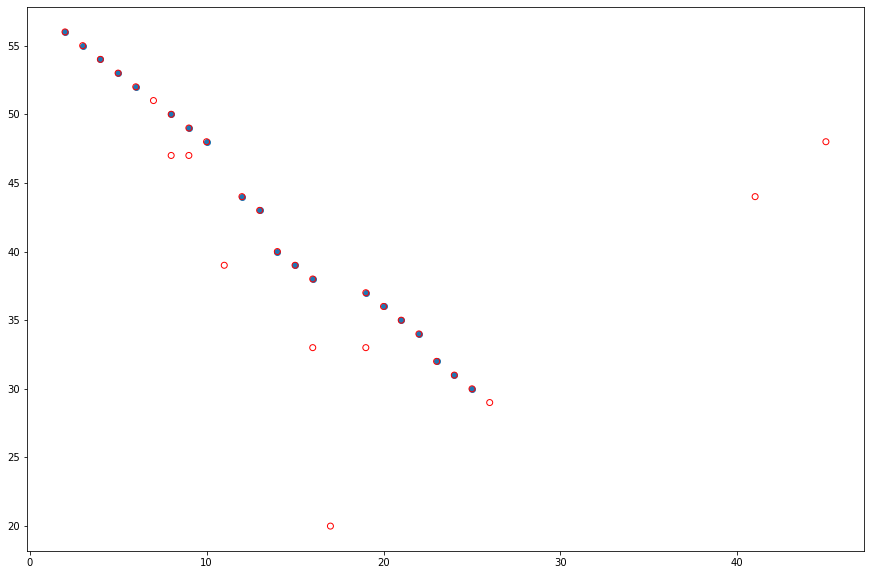

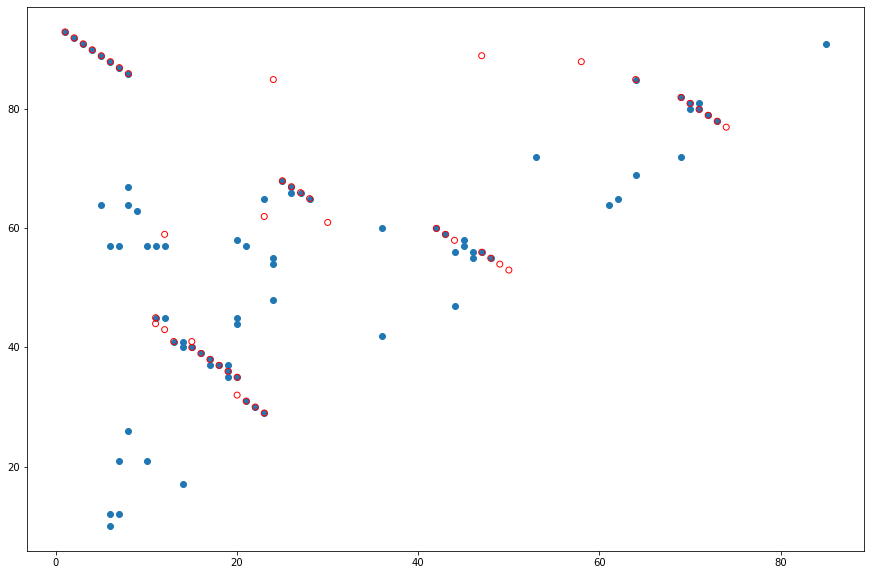

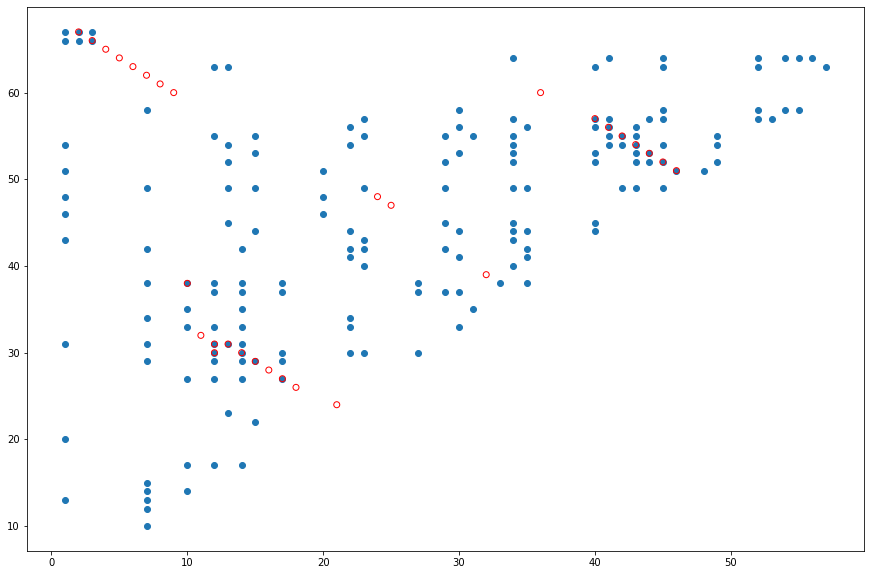

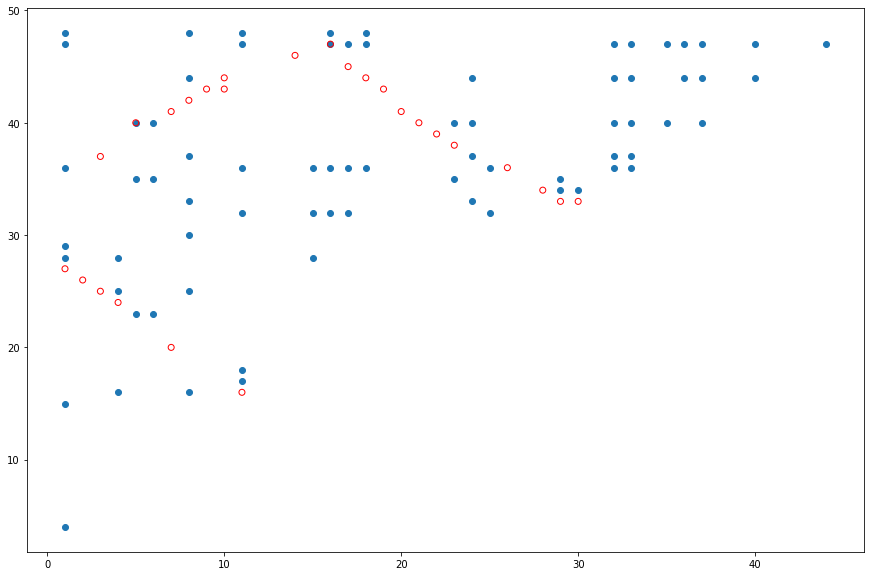

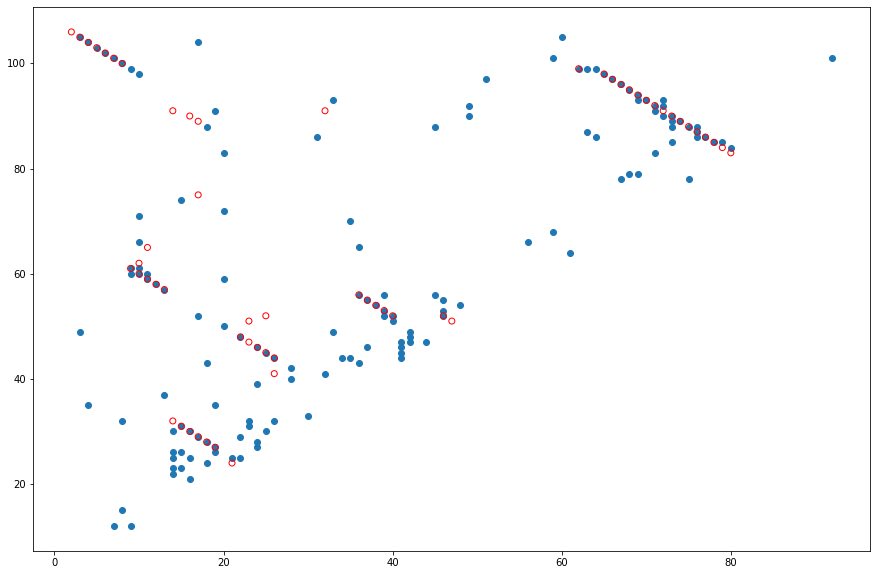

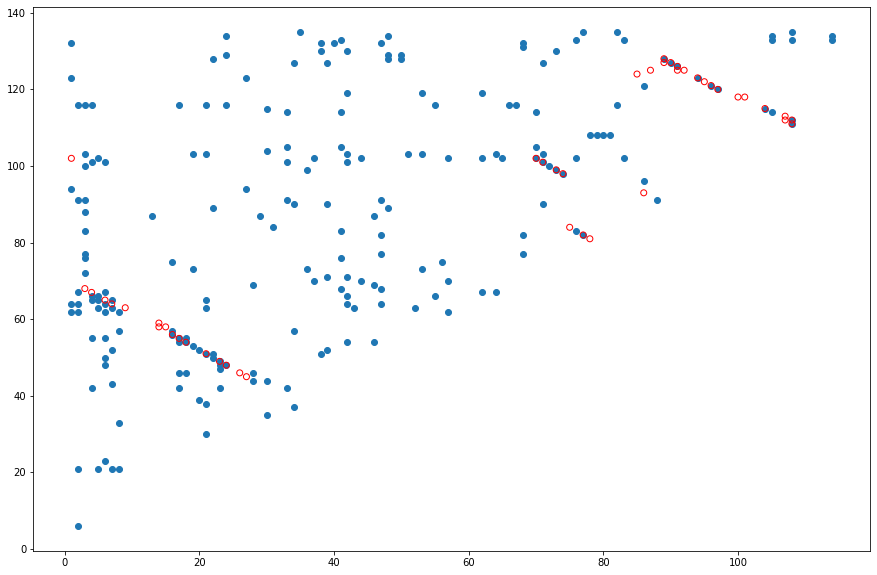

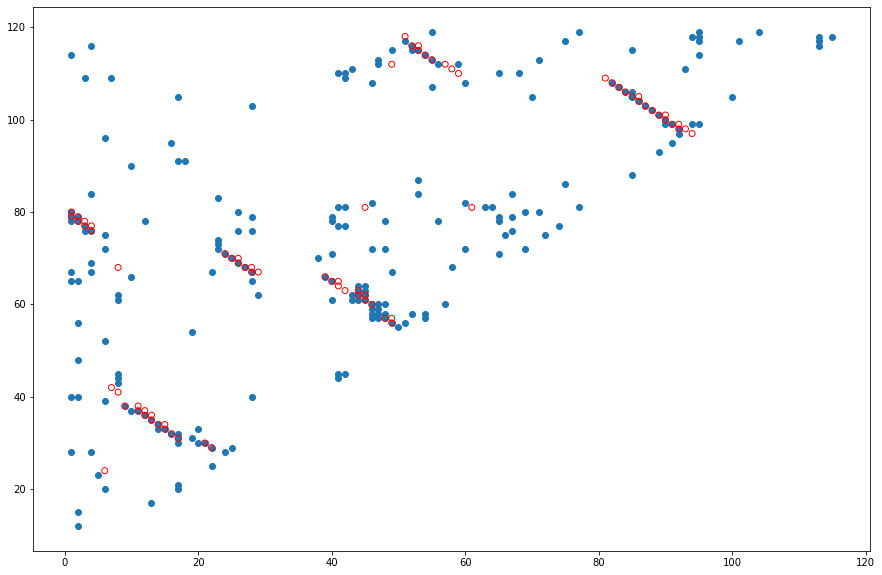

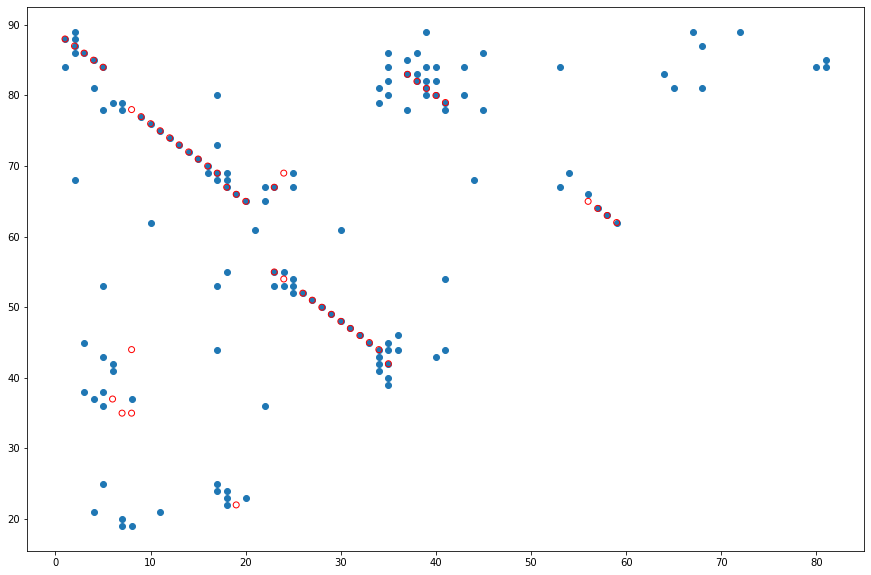

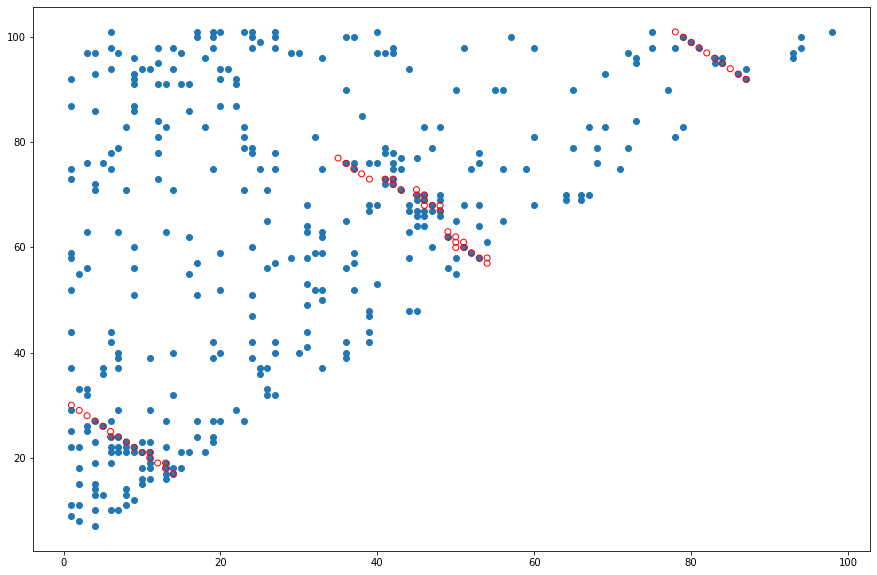

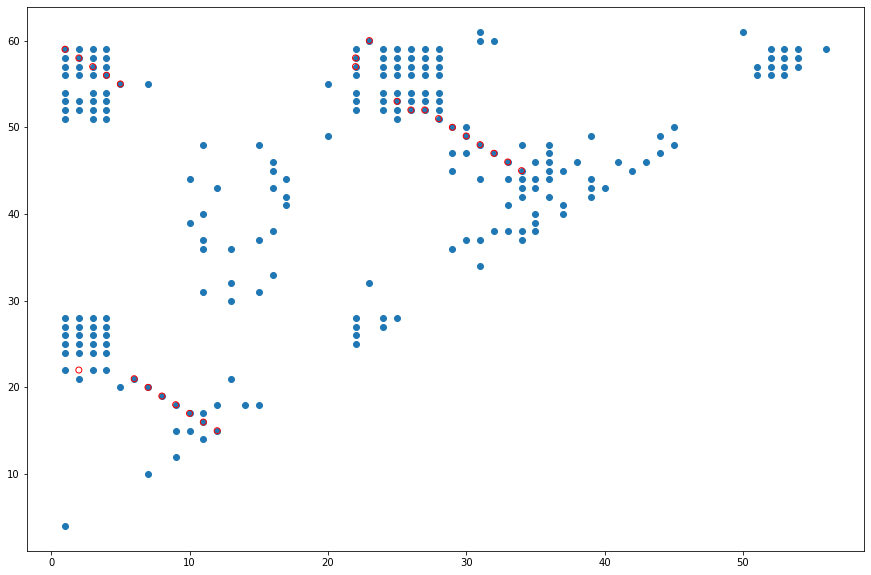

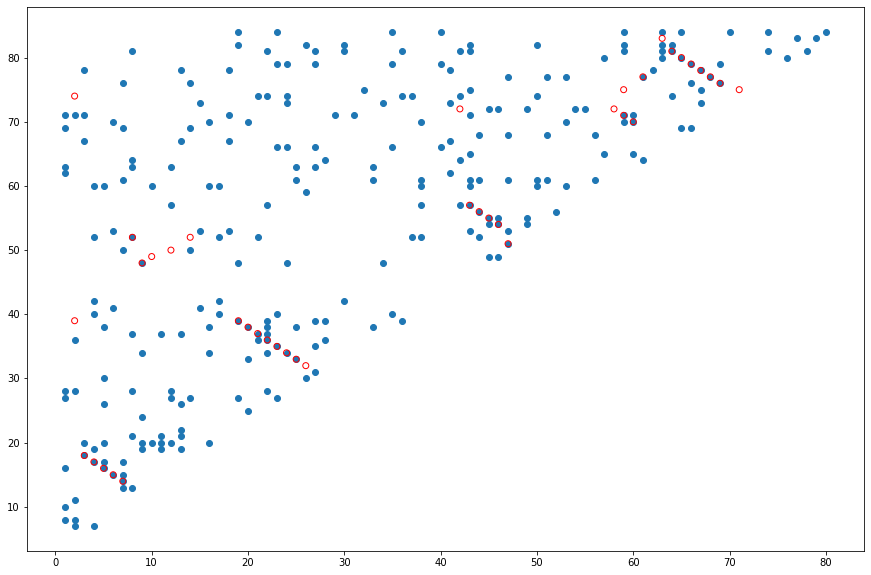

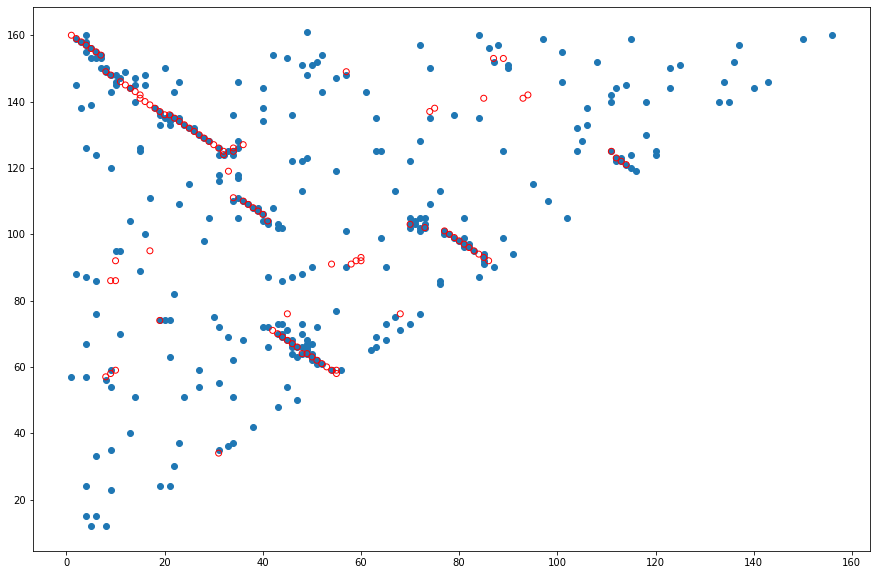

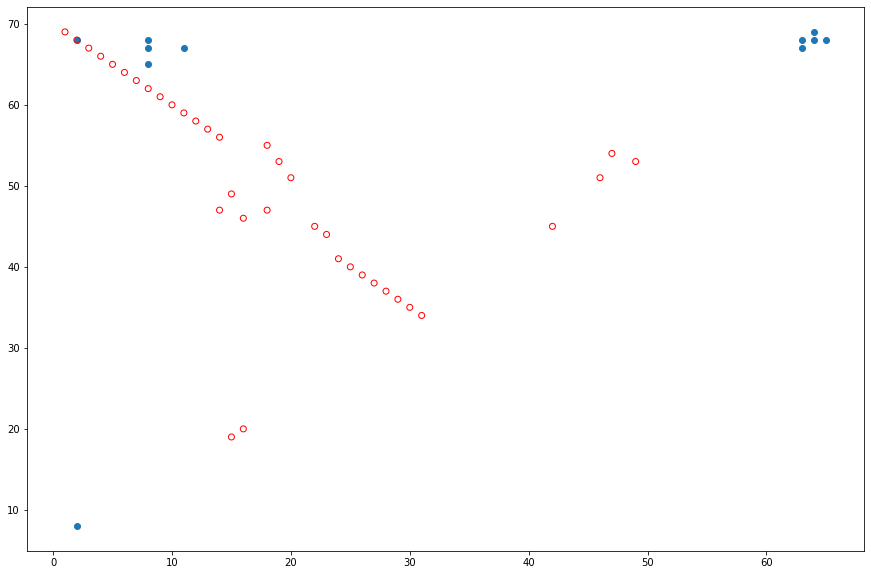

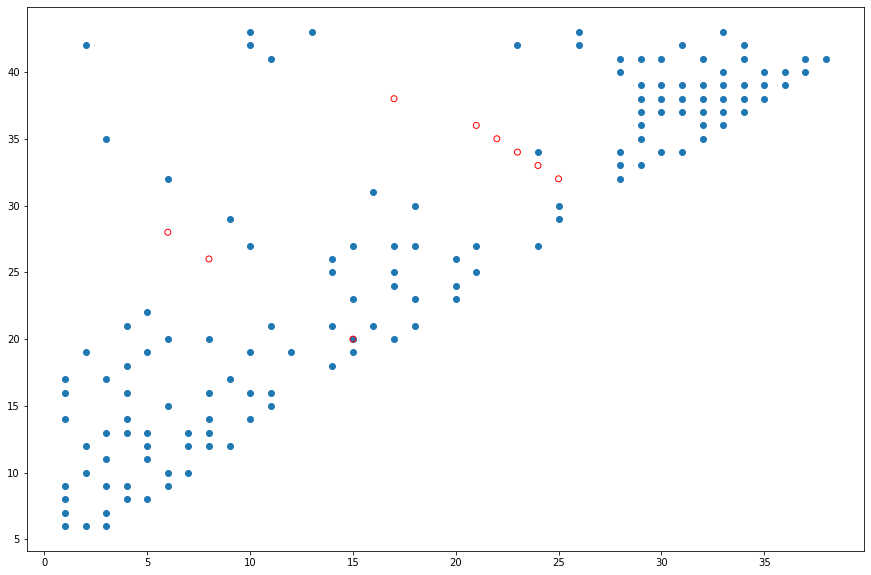

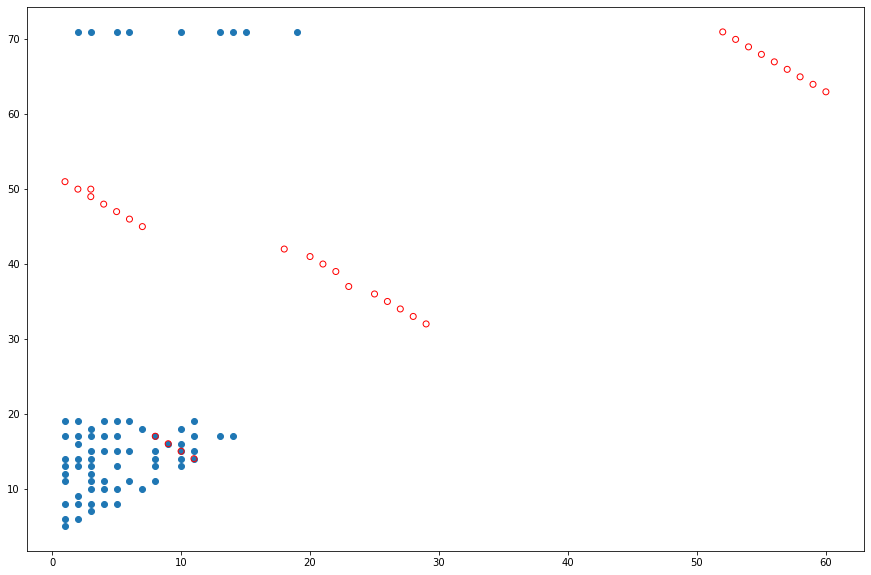

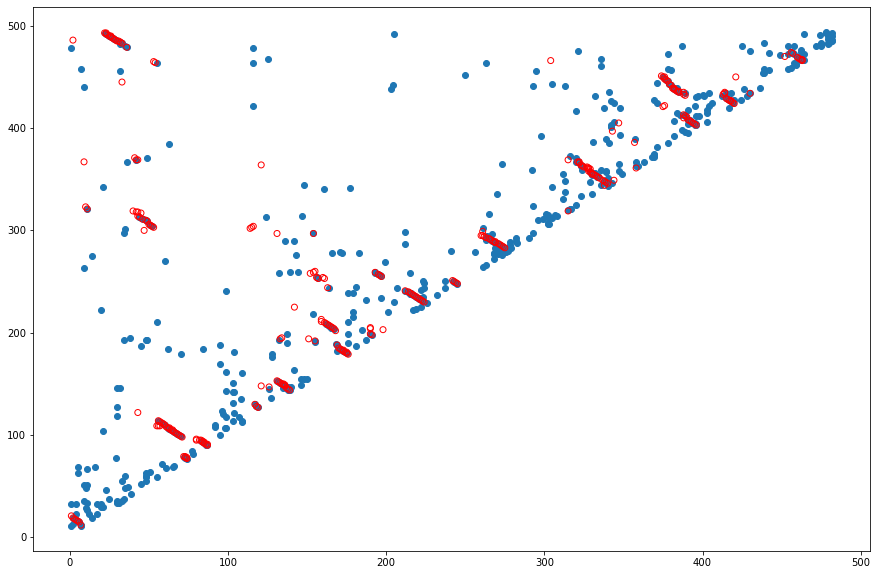

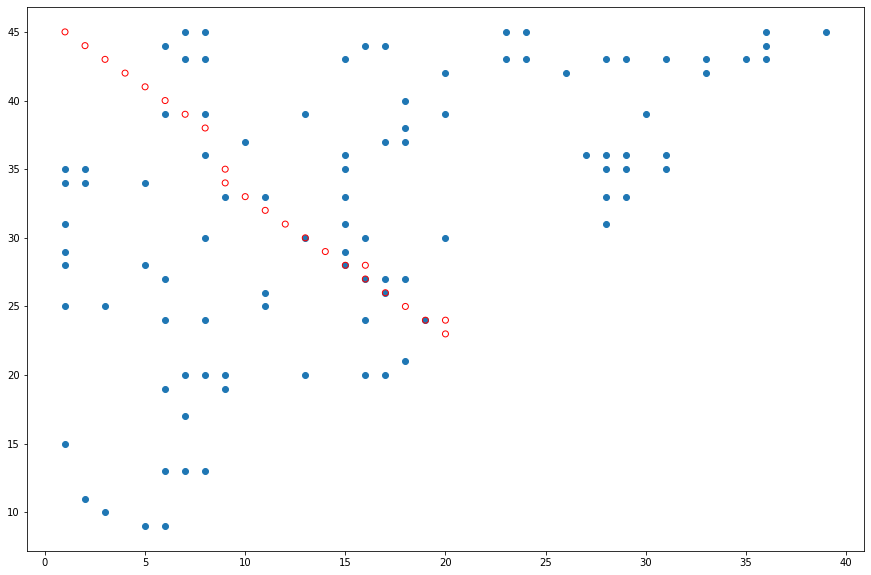

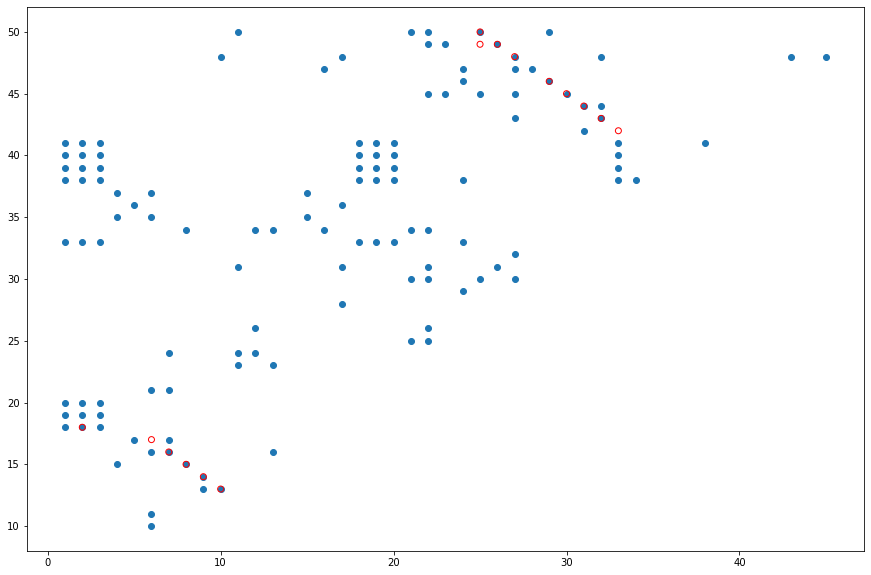

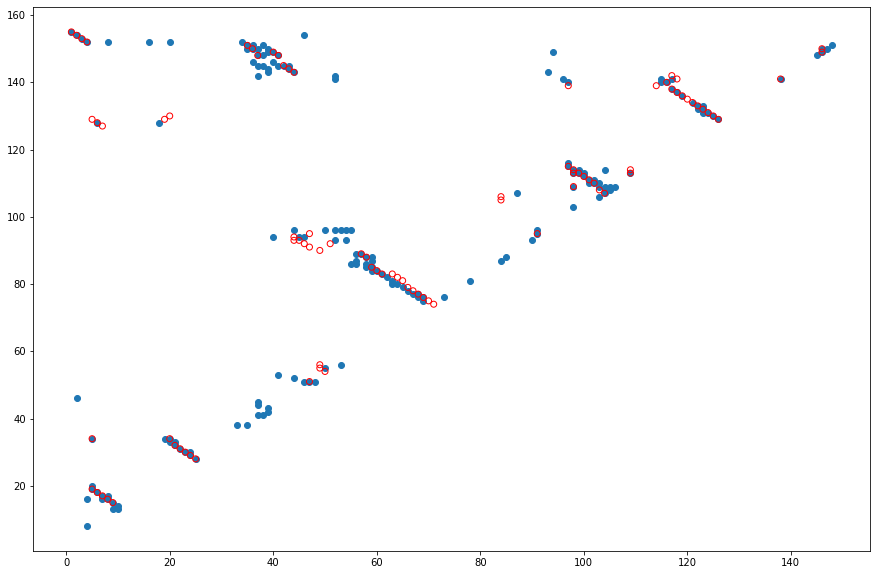

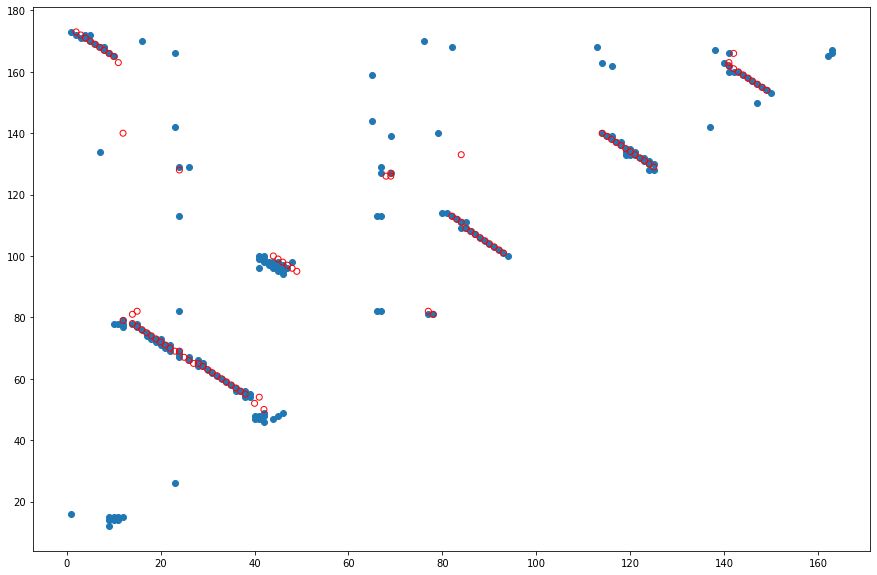

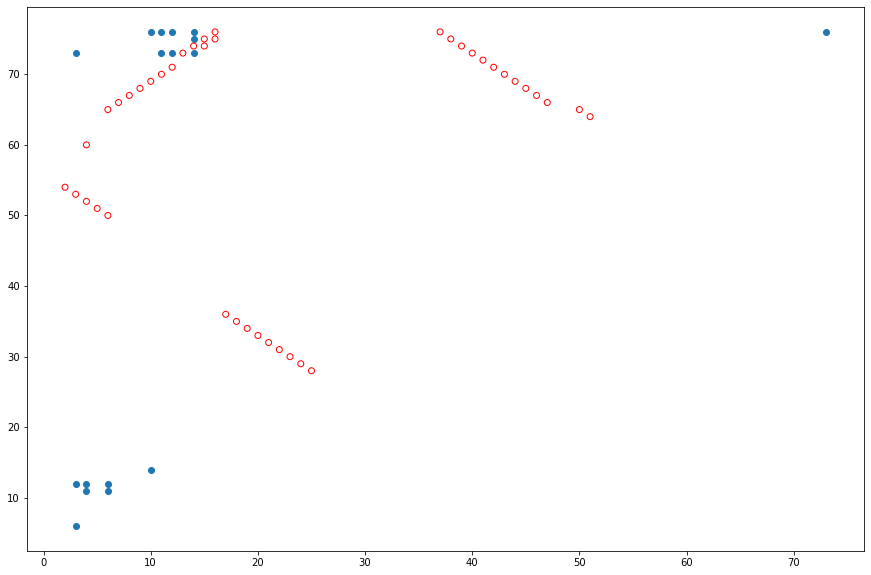

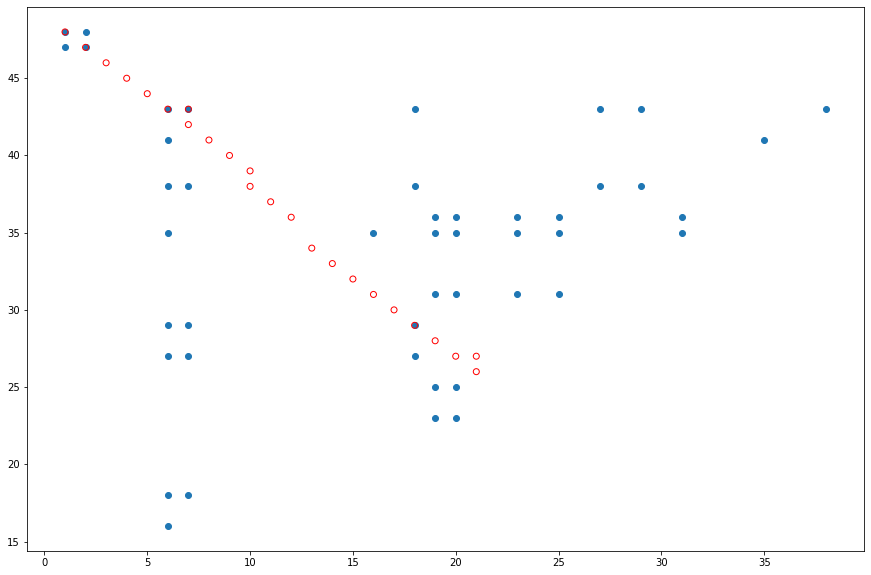

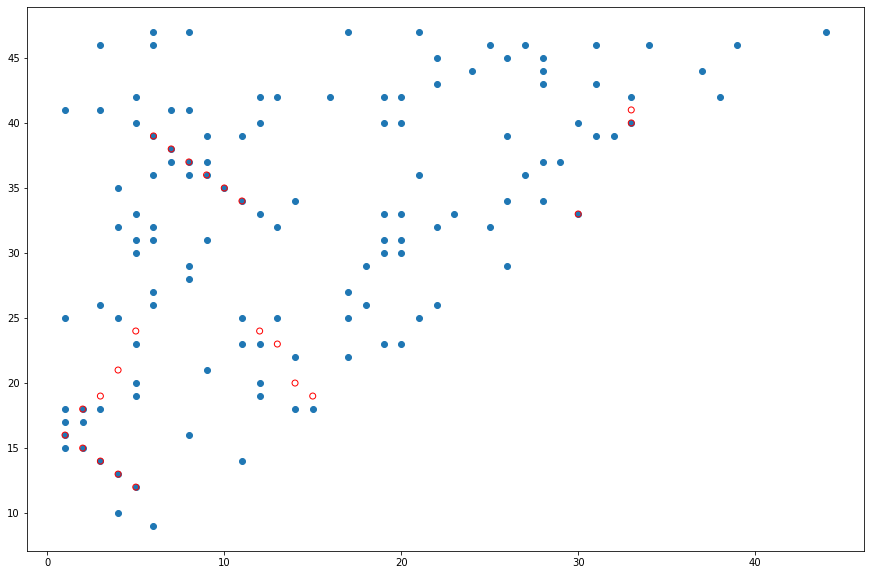

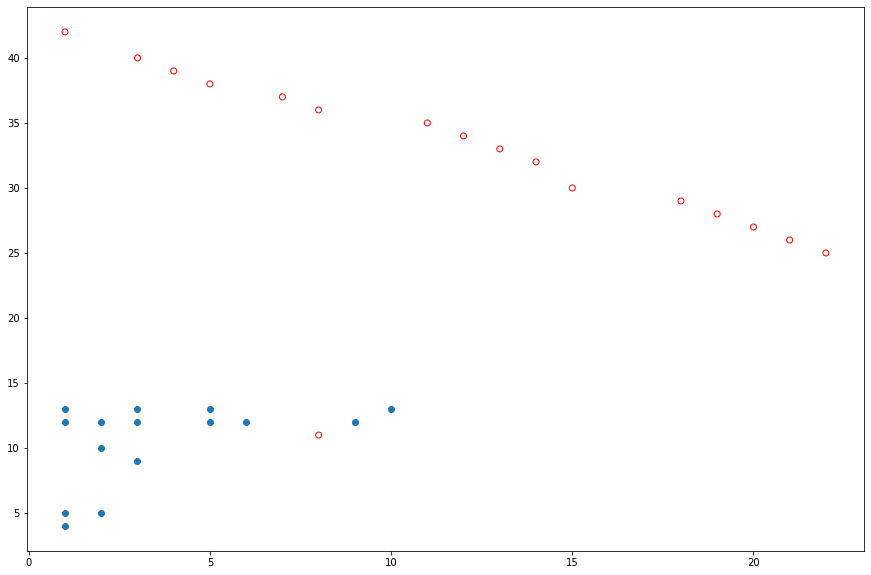

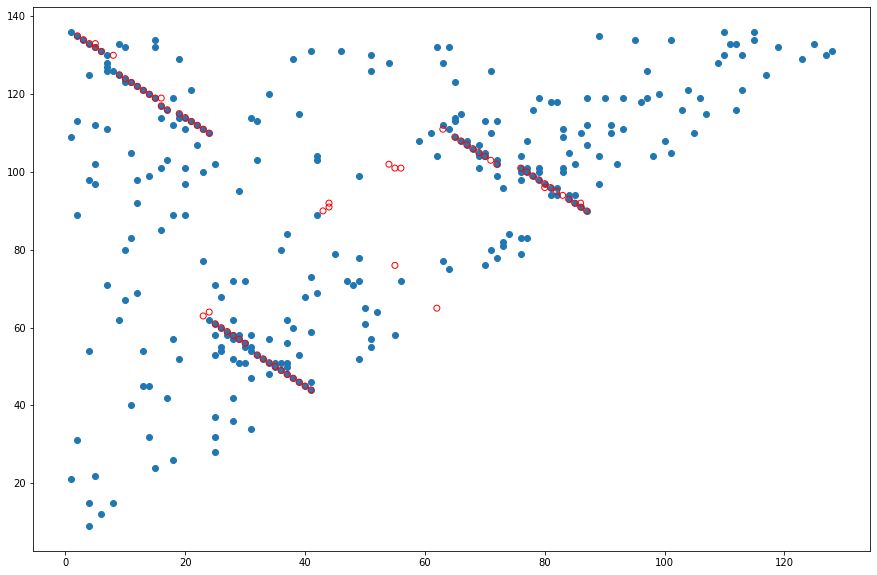

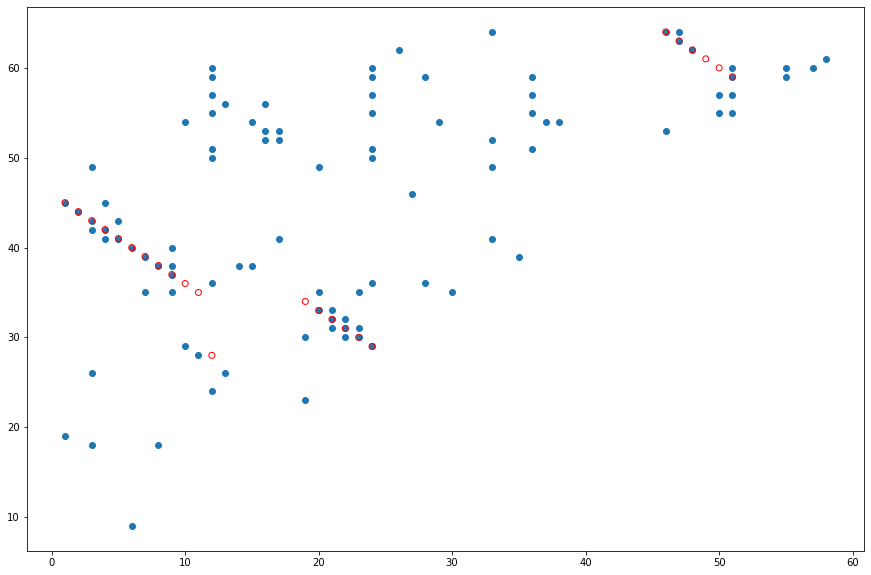

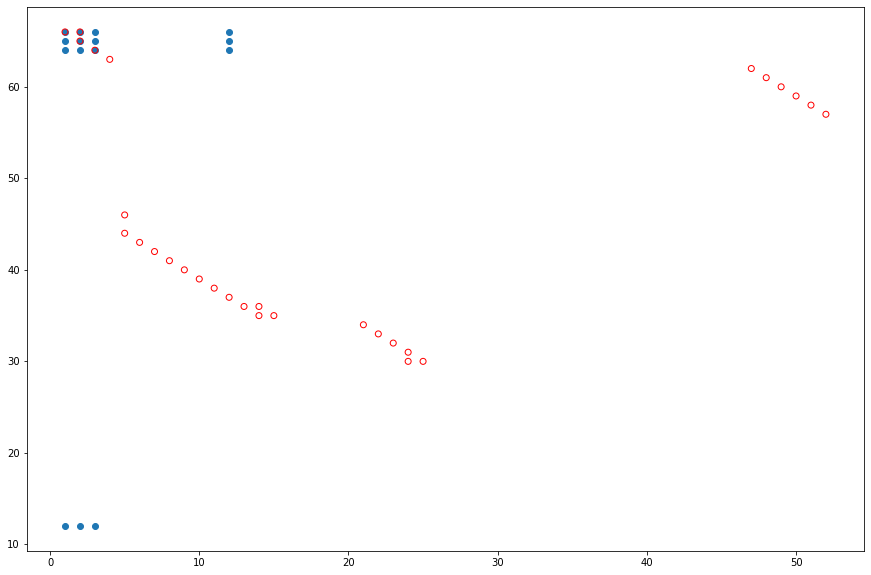

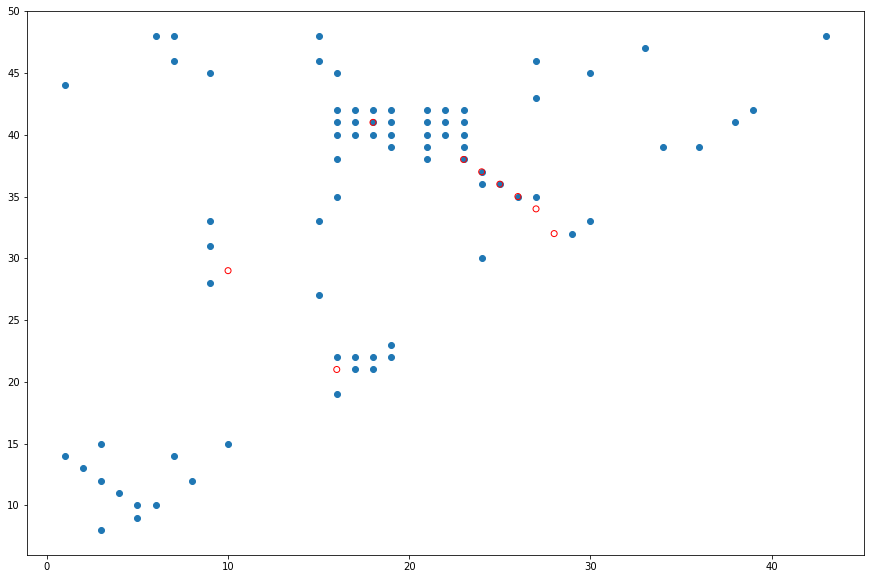

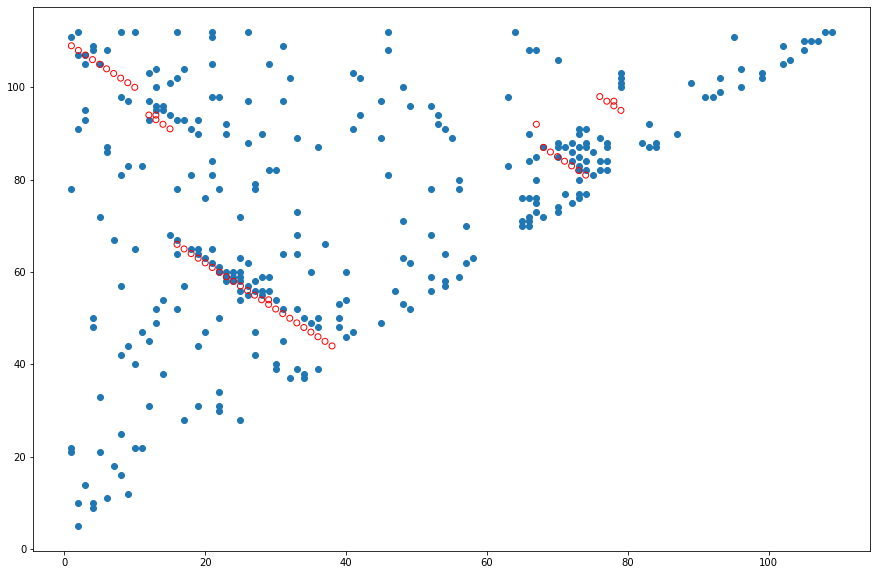

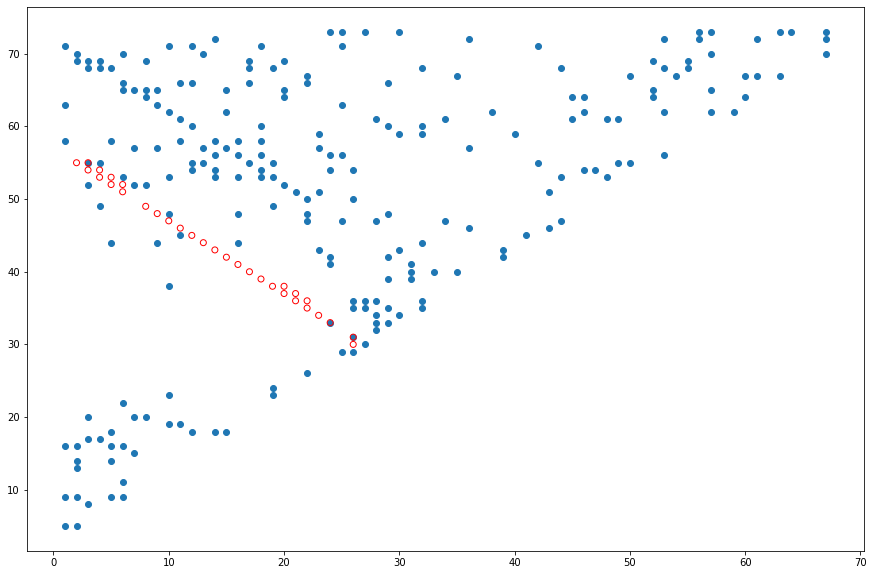

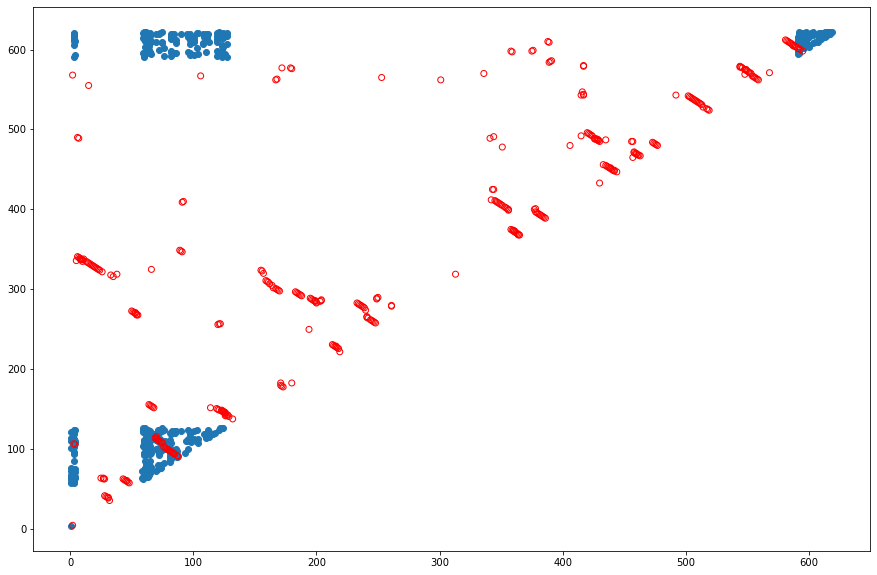

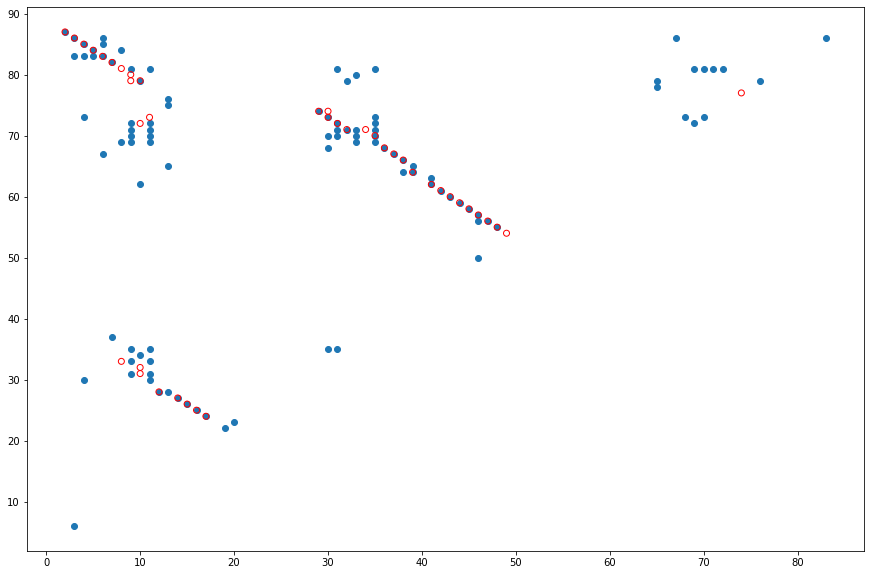

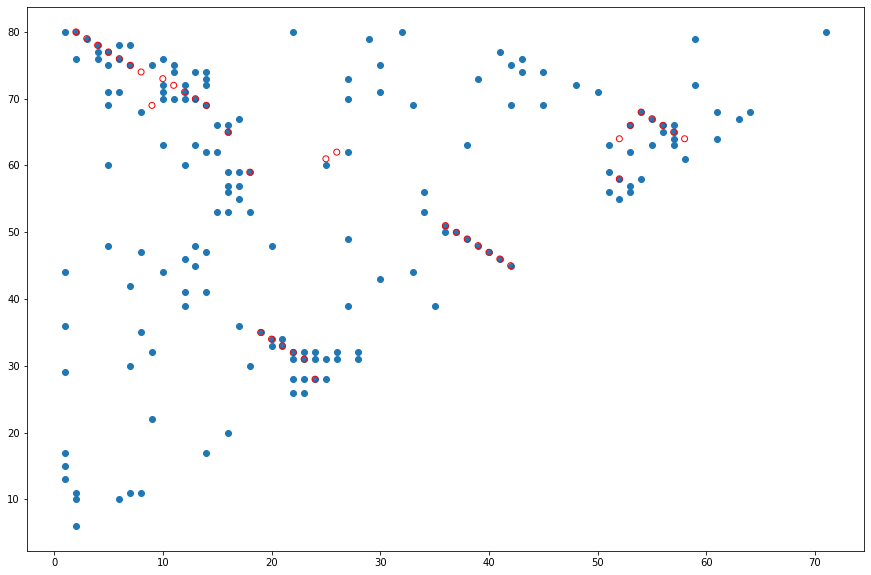

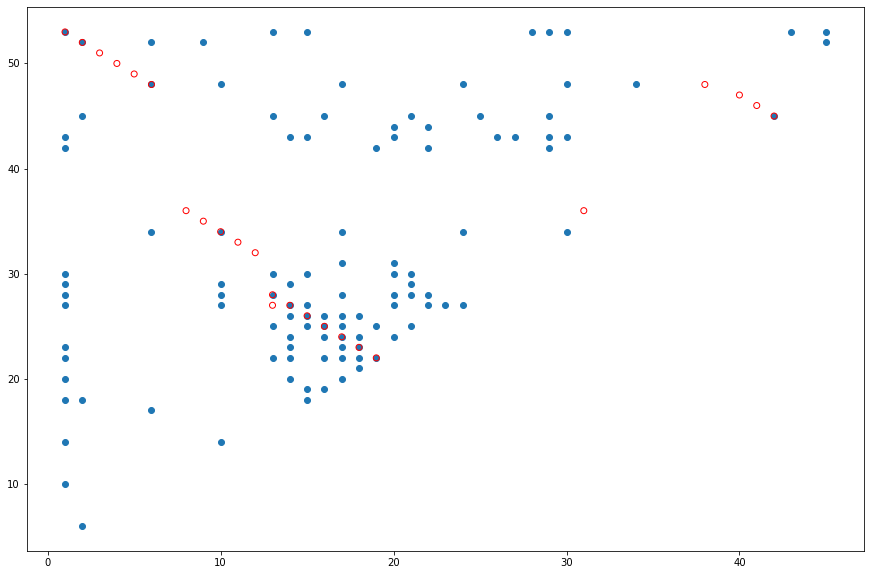

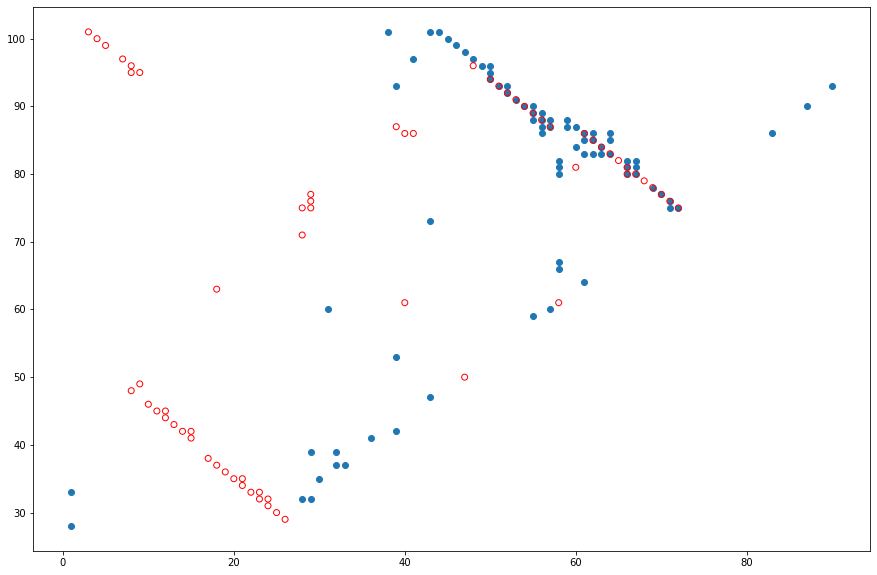

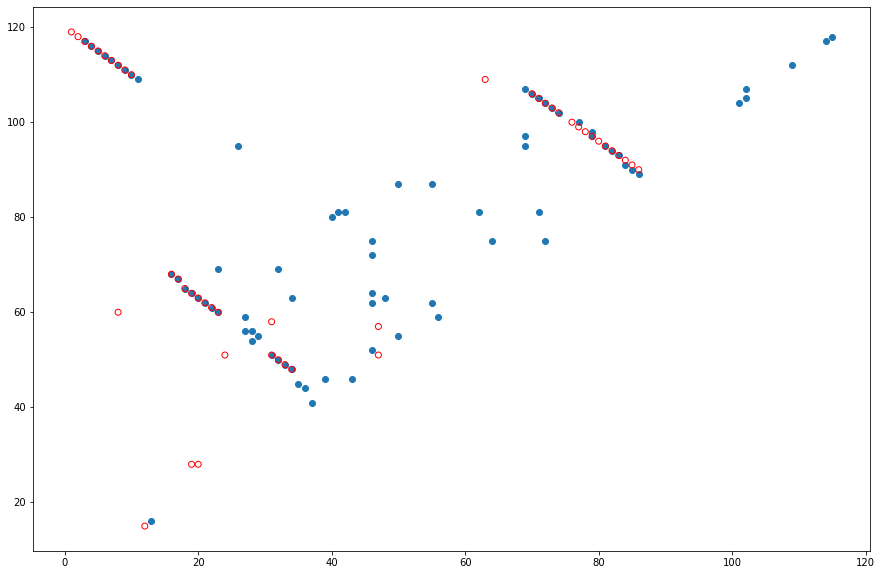

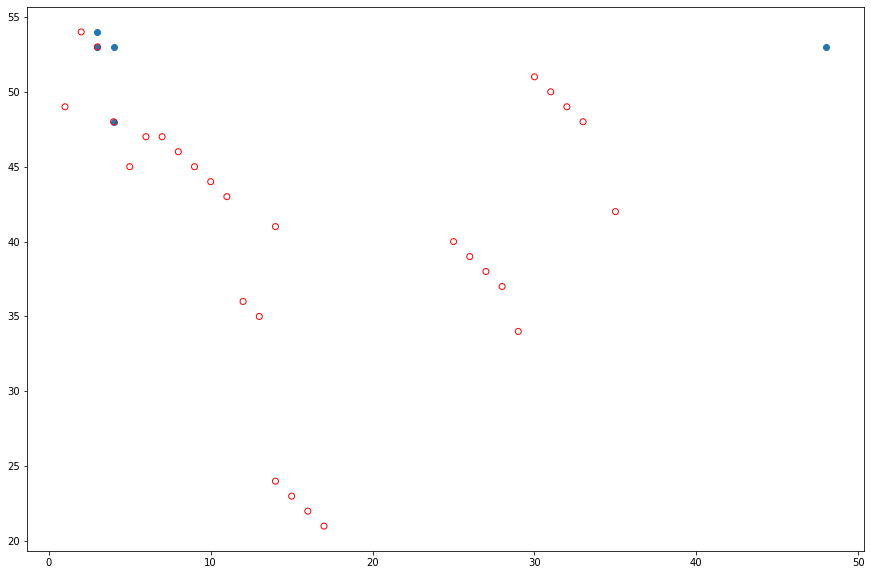

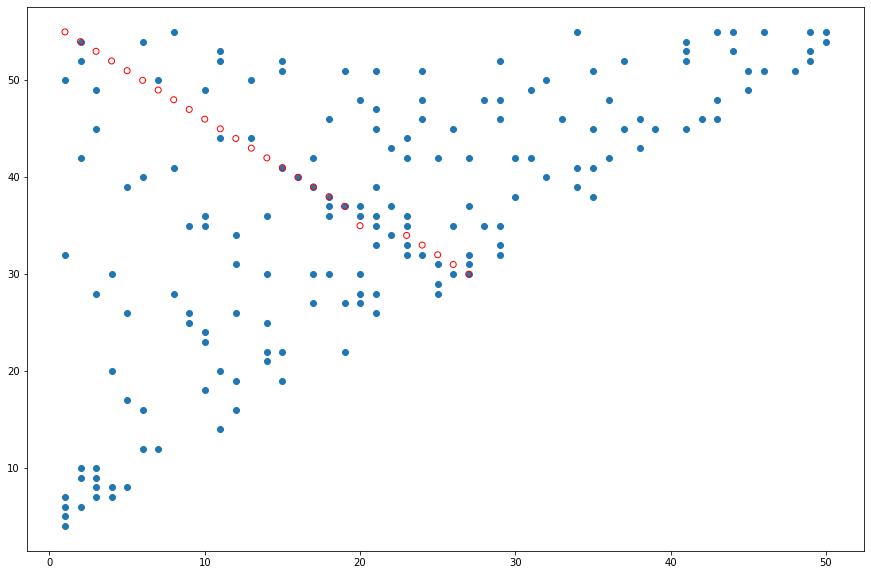

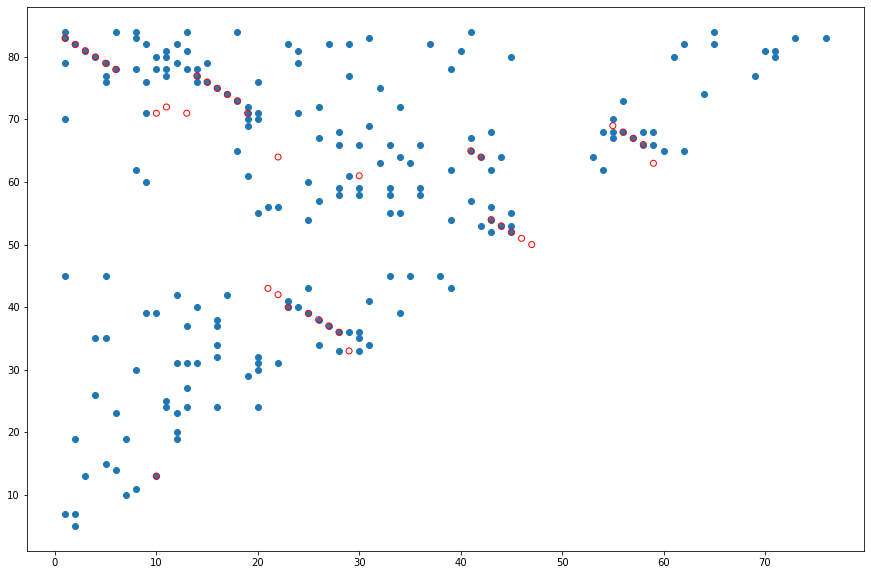

In [212]:
#myDF = df
myPdbs = df.pdb.unique()
print("myPdbs.shape = ",myPdbs.shape[0])
print(df.pdb.unique())
i = 1;
for myPdb in myPdbs:
    myDF = df[df['pdb']==myPdb]
    print (myPdb)
    print("myDF.shape = ",myDF.shape)
    plt.figure()
    #plt.subplot(myPdbs.shape[0], 1, i)
    #plt.subplots(figsize=(15,15))
    plt.scatter(myDF[myDF['dca_val']>.2]['i'],myDF[myDF['dca_val']>.2]['j'])
    plt.scatter(myDF[myDF['bond_type']>0]['i'],myDF[myDF['bond_type']>0]['j'], edgecolors='r', facecolors='none')
    i=i+1
    plt.show